In [1]:
%reset
# import get_marked2pt as m2pt
import numpy as np
%load_ext autoreload
%autoreload 2
import matplotlib
import matplotlib.pyplot as plt
import scipy as sp
import dill
import sys, os
from astropy.io import fits
import scipy.interpolate as interpolate
sys.path.insert(0, '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/cosmosis_code/')
os.environ['COSMOSIS_SRC_DIR'] = '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis'
# import camb
# import LSS_funcs as ghmf
# import general_funcs as gnf
# matplotlib.rcParams['text.usetex'] = True
# matplotlib.rcParams['text.latex.unicode'] = True
font = {'size': 18}
matplotlib.rc('font', **font)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
import pickle as pk




Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


FileNotFoundError: [Errno 2] No such file or directory: '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/results/DV_obj_temp_gty_plancky3_beamed_wmeadv4_20_mod_nM128_nz64_imead1.pk'

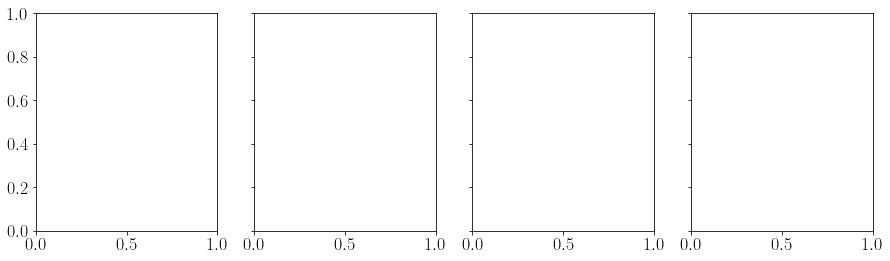

In [2]:
fdir = '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/results/'
# fnames = ['DV_obj_temp_gty_plancky3_beamed_nfw.pk','save_shear_shear_fourier_halofit.fits']
fnames = ['DV_obj_temp_gty_plancky3_beamed_wmeadv4_20_mod_nM128_nz64_imead1.pk','save_shear_shear_fourier_meadmodv4_20_imead1.fits']
labels = ['y x code','Cosmosis']
colors = ['red','blue']
nbins = 4
bins = (np.arange(4) + 1).astype(int)
fig, ax = plt.subplots(1,4, figsize = (15,4),sharex=True,sharey='row')
jc = 0
texts_kk = [r'1,1',r'2,2',r'3,3',r'4,4']
texts_ky = [r'1,y',r'2,y',r'3,y',r'4,y']

for jf in range(len(fnames)):
    tf_name = fdir + fnames[jf]
    if jf == 0:        
        DV = dill.load(open(tf_name,'rb'))
    else:
        df = fits.open(tf_name)
        bin1 = df['xip'].data['BIN1']
        bin2 = df['xip'].data['BIN2']
        value = df['xip'].data['VALUE']
        angle = df['xip'].data['ANG']

 
    for j2 in range(4):
        if jf == 0:
            Cl_val = ['kk']['bin_' + str(j2+1) + '_' + str(j2+1)]['tot']
            ell_val = DV.Cl_result_dict['l_array']
        else:
            ind_sel = np.where((bin1 == j2+1) & (bin2 == j2+1))[0]
            Cl_val = value[ind_sel]
            ell_val = angle[ind_sel]

        ax[j2].errorbar(ell_val, (ell_val)*(ell_val)*Cl_val/(2*np.pi), ls='-',color=colors[jf],label=labels[jf])


#         ax[j2].set_ylim(1e-11,2e-9)



        ax[j2].set_xscale('log')
        ax[j2].set_yscale('log')


        ax[j2].set_xlabel(r'$\ell$', size = 20)
#         ticks  = np.array([1,3,10,50,200])
#         labels_bottom = ticks
#         ax[j2].set_xticks(ticks)
#         ax[j2].set_xticklabels(labels_bottom,  fontsize=15)

        ax[j2].tick_params(axis='both', which='minor', labelsize=15)    
        ax[j2].tick_params(axis='both', which='major', labelsize=15)
#         ax[0,0].legend(fontsize = 18, frameon = False)
        ax[j2].set_xlim((1.0,30000))
        ax[j2].set_ylim((1e-9,1e-3))

#         ax[j1,j2].text( 0.55, 0.96,labels[jc], verticalalignment='top', horizontalalignment='left', transform=ax[j1,j2].transAxes, fontsize=15)
        ax[j2].text( 0.15, 0.96,texts_kk[j2], verticalalignment='top', horizontalalignment='left', transform=ax[j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    
#         ax[j2].text( 0.75, 0.96,texts_ky[j2], verticalalignment='top', horizontalalignment='left', transform=ax[j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    
#         ax[2,j2].text( 0.75, 0.96,texts_kk[j2], verticalalignment='top', horizontalalignment='left', transform=ax[2,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))


        jc += 1

# yticks  = np.array([-0.45,-0.3,-0.15,0.00,0.15,0.3,0.45])
# labels_bottom = yticks
# ax[0,0].set_yticks(yticks)
# ax[0,0].set_yticklabels(labels_bottom,  fontsize=15)
# ax[1,0].set_yticks(yticks)
# ax[1,0].set_yticklabels(labels_bottom,  fontsize=15)


# ax[0,0].set_ylabel(r'$\xi_{\rm mm}$ comparison', size = 22)
ax[0].set_ylabel(r'$\ell (\ell+1) C_{\ell}/2\pi$ ', size = 22)
# ax[1,0].set_ylabel(r'$\xi_{y\kappa}(\theta)$ ', size = 22)
# ax[2,0].set_ylabel(r'$\xi_{\kappa \kappa}(\theta)$ ', size = 22)
ax[3].legend(fontsize=16,loc='lower right')
#     ax[1,j].tick_params(axis='both', which='major', labelsize=15)



plt.tight_layout()

# fig.savefig('Cl_kk_comp_mead.pdf')


    








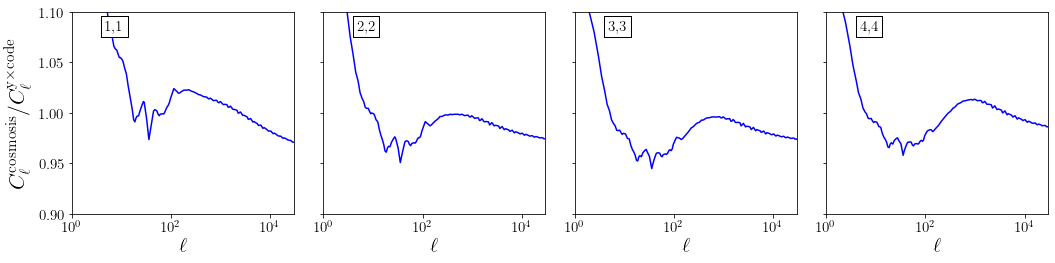

In [150]:



fdir = '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/results/'
# fnames = ['DV_obj_temp_gty_plancky3_beamed_nfw.pk','save_shear_shear_fourier_halofit.fits']
# fnames = ['DV_obj_temp_gty_plancky3_beamed_wmeadv4_20_mod_200c_bullock.pk','save_shear_shear_fourier_meadmodv4_20_al1.fits']
fnames = ['DV_obj_temp_gty_plancky3_beamed_wmeadv4_20_mod_nM128_nz64_imead1.pk','save_shear_shear_fourier_meadmodv4_20_imead1.fits']
labels = ['y x code','Cosmosis']
colors = ['red','blue']
nbins = 4
bins = (np.arange(4) + 1).astype(int)
fig, ax = plt.subplots(1,4, figsize = (15,4),sharex=True,sharey='row')
jc = 0
texts_kk = [r'1,1',r'2,2',r'3,3',r'4,4']
texts_ky = [r'1,y',r'2,y',r'3,y',r'4,y']

ellmin = 1.0
ellmax = 1e4

for j2 in range(4):
    for jf in range(len(fnames)):
        tf_name = fdir + fnames[jf]
        if jf == 0:        
            DV = dill.load(open(tf_name,'rb'))
        else:
            df = fits.open(tf_name)
            bin1 = df['xip'].data['BIN1']
            bin2 = df['xip'].data['BIN2']
            value = df['xip'].data['VALUE']
            angle = df['xip'].data['ANG']

 
    
        if jf == 0:
            Cl_yx = DV.Cl_result_dict['kk']['bin_' + str(j2+1) + '_' + str(j2+1)]['tot']
            ell_yx = DV.Cl_result_dict['l_array']
            Cl_yx_interp = interpolate.interp1d(np.log(ell_yx),np.log(Cl_yx))
        else:
            ind_sel = np.where((bin1 == j2+1) & (bin2 == j2+1))[0]
            Cl_cos = value[ind_sel]
            ell_cos = angle[ind_sel]
            Cl_yx_ellcos = np.exp(Cl_yx_interp(np.log(ell_cos)))

            ax[j2].errorbar(ell_val, Cl_cos/Cl_yx_ellcos, ls='-',color=colors[jf])


#         ax[j2].set_ylim(1e-11,2e-9)



        ax[j2].set_xscale('log')
#         ax[j2].set_yscale('log')


        ax[j2].set_xlabel(r'$\ell$', size = 20)
#         ticks  = np.array([1,3,10,50,200])
#         labels_bottom = ticks
#         ax[j2].set_xticks(ticks)
#         ax[j2].set_xticklabels(labels_bottom,  fontsize=15)

        ax[j2].tick_params(axis='both', which='minor', labelsize=15)    
        ax[j2].tick_params(axis='both', which='major', labelsize=15)
#         ax[0,0].legend(fontsize = 18, frameon = False)
        ax[j2].set_xlim((1.0,30000))
        ax[j2].set_ylim((0.9,1.1))

#         ax[j1,j2].text( 0.55, 0.96,labels[jc], verticalalignment='top', horizontalalignment='left', transform=ax[j1,j2].transAxes, fontsize=15)
        ax[j2].text( 0.15, 0.96,texts_kk[j2], verticalalignment='top', horizontalalignment='left', transform=ax[j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    
#         ax[j2].text( 0.75, 0.96,texts_ky[j2], verticalalignment='top', horizontalalignment='left', transform=ax[j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    
#         ax[2,j2].text( 0.75, 0.96,texts_kk[j2], verticalalignment='top', horizontalalignment='left', transform=ax[2,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))


        jc += 1

# yticks  = np.array([-0.45,-0.3,-0.15,0.00,0.15,0.3,0.45])
# labels_bottom = yticks
# ax[0,0].set_yticks(yticks)
# ax[0,0].set_yticklabels(labels_bottom,  fontsize=15)
# ax[1,0].set_yticks(yticks)
# ax[1,0].set_yticklabels(labels_bottom,  fontsize=15)


# ax[0,0].set_ylabel(r'$\xi_{\rm mm}$ comparison', size = 22)
ax[0].set_ylabel(r'$C^{\rm cosmosis}_{\ell}/C^{\rm y \times code}_{\ell}$ ', size = 22)
# ax[1,0].set_ylabel(r'$\xi_{y\kappa}(\theta)$ ', size = 22)
# ax[2,0].set_ylabel(r'$\xi_{\kappa \kappa}(\theta)$ ', size = 22)
# ax[3].legend(fontsize=16,loc='lower right')
#     ax[1,j].tick_params(axis='both', which='major', labelsize=15)



plt.tight_layout()

# fig.savefig('Cl_kk_comp_ratio_mead.pdf')


    









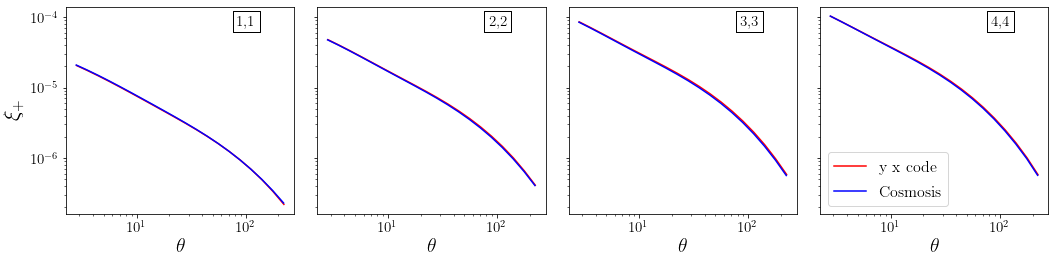

In [146]:



fdir = '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/results/'
# fnames = ['DV_obj_temp_gty_plancky3_beamed_nfw_rsgrs1.pk','save_shear_shear_real_halofit.fits']
# fnames = ['DV_obj_temp_gty_plancky3_beamed_wmeadv4_20_mod_200c_bullock.pk','save_shear_shear_real_meadmodv4_20_al1.fits']
fnames = ['DV_obj_temp_gty_plancky3_beamed_wmeadv4_20_mod_nM128_nz64_imead1.pk','save_shear_shear_real_meadmodv4_20_imead1.fits']
labels = ['y x code','Cosmosis']
colors = ['red','blue']
nbins = 4
bins = (np.arange(4) + 1).astype(int)
fig, ax = plt.subplots(1,4, figsize = (15,4),sharex=True,sharey='row')
jc = 0
texts_kk = [r'1,1',r'2,2',r'3,3',r'4,4']
texts_ky = [r'1,y',r'2,y',r'3,y',r'4,y']

for jf in range(len(fnames)):
    tf_name = fdir + fnames[jf]
    if jf == 0:        
        DV = dill.load(open(tf_name,'rb'))
    else:
        df = fits.open(tf_name)
        bin1 = df['xip'].data['BIN1']
        bin2 = df['xip'].data['BIN2']
        value = df['xip'].data['VALUE']
        angle = df['xip'].data['ANG']

 
    for j2 in range(4):
        if jf == 0:
            xi_val = DV.xi_result_dict['kk']['bin_' + str(j2+1) + '_' + str(j2+1)]
            th_val = DV.xi_result_dict['kk']['theta']
        else:
            ind_sel = np.where((bin1 == j2+1) & (bin2 == j2+1))[0]
            xi_val = value[ind_sel]
            th_val = angle[ind_sel]

        ax[j2].errorbar(th_val, xi_val, ls='-',color=colors[jf],label=labels[jf])


#         ax[j2].set_ylim(1e-11,2e-9)



        ax[j2].set_xscale('log')
        ax[j2].set_yscale('log')


        ax[j2].set_xlabel(r'$\theta$', size = 20)
#         ticks  = np.array([1,3,10,50,200])
#         labels_bottom = ticks
#         ax[j2].set_xticks(ticks)
#         ax[j2].set_xticklabels(labels_bottom,  fontsize=15)

        ax[j2].tick_params(axis='both', which='minor', labelsize=15)    
        ax[j2].tick_params(axis='both', which='major', labelsize=15)
#         ax[0,0].legend(fontsize = 18, frameon = False)
#         ax[j2].set_xlim((1.0,10000))
#         ax[j2].set_ylim((1e-9,1e-3))

#         ax[j1,j2].text( 0.55, 0.96,labels[jc], verticalalignment='top', horizontalalignment='left', transform=ax[j1,j2].transAxes, fontsize=15)
        ax[j2].text( 0.75, 0.96,texts_kk[j2], verticalalignment='top', horizontalalignment='left', transform=ax[j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    
#         ax[j2].text( 0.75, 0.96,texts_ky[j2], verticalalignment='top', horizontalalignment='left', transform=ax[j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    
#         ax[2,j2].text( 0.75, 0.96,texts_kk[j2], verticalalignment='top', horizontalalignment='left', transform=ax[2,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))


        jc += 1

# yticks  = np.array([-0.45,-0.3,-0.15,0.00,0.15,0.3,0.45])
# labels_bottom = yticks
# ax[0,0].set_yticks(yticks)
# ax[0,0].set_yticklabels(labels_bottom,  fontsize=15)
# ax[1,0].set_yticks(yticks)
# ax[1,0].set_yticklabels(labels_bottom,  fontsize=15)


# ax[0,0].set_ylabel(r'$\xi_{\rm mm}$ comparison', size = 22)
ax[0].set_ylabel(r'$\xi_{+}$ ', size = 22)
# ax[1,0].set_ylabel(r'$\xi_{y\kappa}(\theta)$ ', size = 22)
# ax[2,0].set_ylabel(r'$\xi_{\kappa \kappa}(\theta)$ ', size = 22)
ax[3].legend(fontsize=16,loc='lower left')
#     ax[1,j].tick_params(axis='both', which='major', labelsize=15)



plt.tight_layout()

# fig.savefig('xiplus_kk_comp_mead.pdf')


    



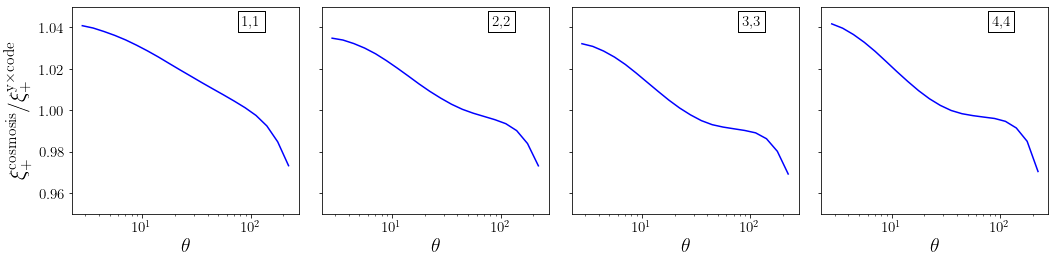

In [169]:
fdir = '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/results/'
# fnames = ['DV_obj_temp_gty_plancky3_beamed_nfw.pk','save_shear_shear_real_halofit.fits']
# fnames = ['DV_obj_temp_gty_plancky3_beamed_wmeadv4_20_mod_200c_bullock.pk','save_shear_shear_real_meadmodv4_20_al1.fits']

# fnames = ['DV_obj_temp_gty_plancky3_beamed_wmeadv4_20_mod_200c_bullock_imead1.pk','save_shear_shear_real_meadmodv4_20_imead1.fits']
# fnames = ['DV_obj_temp_gty_plancky3_beamed_wmeadv4_20_mod_nM128_imead1.pk','save_shear_shear_real_meadmodv4_20_imead1.fits']
# fnames = ['DV_obj_temp_gty_plancky3_beamed_wmeadv4_20_mod_nM128_nz64_imead1.pk','save_shear_shear_real_meadmodv4_20_imead1.fits']
fnames = ['DV_obj_temp_gty_plancky3_beamed_wmeadv4_20_mod_M8_17_nM50_nz180_imead1.pk','save_shear_shear_real_meadmodv4_20_imead1.fits']

labels = ['y x code','Cosmosis']
colors = ['red','blue']
nbins = 4
bins = (np.arange(4) + 1).astype(int)
fig, ax = plt.subplots(1,4, figsize = (15,4),sharex=True,sharey='row')
jc = 0
texts_kk = [r'1,1',r'2,2',r'3,3',r'4,4']
texts_ky = [r'1,y',r'2,y',r'3,y',r'4,y']

for j2 in range(4):
    for jf in range(len(fnames)):
        tf_name = fdir + fnames[jf]
        if jf == 0:        
            DV = dill.load(open(tf_name,'rb'))
        else:
            df = fits.open(tf_name)
            bin1 = df['xip'].data['BIN1']
            bin2 = df['xip'].data['BIN2']
            value = df['xip'].data['VALUE']
            angle = df['xip'].data['ANG']

 
    
        if jf == 0:
            xi_yx = DV.xi_result_dict['kk']['bin_' + str(j2+1) + '_' + str(j2+1)]
            th_yx = DV.xi_result_dict['kk']['theta']
            xi_yx_interp = interpolate.interp1d(np.log(th_yx),np.log(xi_yx),fill_value='extrapolate')
        else:
            ind_sel = np.where((bin1 == j2+1) & (bin2 == j2+1))[0]
            xi_cos = value[ind_sel]
            th_cos = angle[ind_sel]
            xi_yx_thcos = np.exp(xi_yx_interp(np.log(th_cos)))

            ax[j2].errorbar(th_cos, xi_cos/xi_yx_thcos, ls='-',color=colors[jf])


#         ax[j2].set_ylim(1e-11,2e-9)



        ax[j2].set_xscale('log')
#         ax[j2].set_yscale('log')


        ax[j2].set_xlabel(r'$\theta$', size = 20)
#         ticks  = np.array([1,3,10,50,200])
#         labels_bottom = ticks
#         ax[j2].set_xticks(ticks)
#         ax[j2].set_xticklabels(labels_bottom,  fontsize=15)

        ax[j2].tick_params(axis='both', which='minor', labelsize=15)    
        ax[j2].tick_params(axis='both', which='major', labelsize=15)
#         ax[0,0].legend(fontsize = 18, frameon = False)
#         ax[j2].set_xlim((1.0,10000))
        ax[j2].set_ylim((0.95,1.05))

#         ax[j1,j2].text( 0.55, 0.96,labels[jc], verticalalignment='top', horizontalalignment='left', transform=ax[j1,j2].transAxes, fontsize=15)
        ax[j2].text( 0.75, 0.96,texts_kk[j2], verticalalignment='top', horizontalalignment='left', transform=ax[j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    
#         ax[j2].text( 0.75, 0.96,texts_ky[j2], verticalalignment='top', horizontalalignment='left', transform=ax[j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    
#         ax[2,j2].text( 0.75, 0.96,texts_kk[j2], verticalalignment='top', horizontalalignment='left', transform=ax[2,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))


        jc += 1

# yticks  = np.array([-0.45,-0.3,-0.15,0.00,0.15,0.3,0.45])
# labels_bottom = yticks
# ax[0,0].set_yticks(yticks)
# ax[0,0].set_yticklabels(labels_bottom,  fontsize=15)
# ax[1,0].set_yticks(yticks)
# ax[1,0].set_yticklabels(labels_bottom,  fontsize=15)


# ax[0,0].set_ylabel(r'$\xi_{\rm mm}$ comparison', size = 22)
ax[0].set_ylabel(r'$\xi^{\rm cosmosis}_{+}/\xi^{\rm y \times code}_{+}$ ', size = 22)
# ax[1,0].set_ylabel(r'$\xi_{y\kappa}(\theta)$ ', size = 22)
# ax[2,0].set_ylabel(r'$\xi_{\kappa \kappa}(\theta)$ ', size = 22)
# ax[3].legend(fontsize=16,loc='lower left')
#     ax[1,j].tick_params(axis='both', which='major', labelsize=15)



plt.tight_layout()

# fig.savefig('xiplus_kk_comp_mead_ratio.pdf')








In [179]:
fdir = '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/results/'
fname = 'DV_obj_temp_gty_plancky3_beamed_wmeadv4_20_mod_M8_17_nM50_nz180_imead1.pk'
DV = dill.load(open(fdir + fname,'rb'))
DV.xi_result_dict['gty']['bin_' + str(1) + '_' + str(0)]



array([1.54872618e-10, 2.34187066e-10, 3.45071445e-10, 4.89153651e-10,
       6.55762011e-10, 8.14984019e-10, 9.22727885e-10, 9.46589910e-10,
       8.91203673e-10, 7.88001886e-10, 6.67226560e-10, 5.47808479e-10,
       4.39699896e-10, 3.46915249e-10, 2.69936975e-10, 2.07591788e-10,
       1.58013378e-10, 1.19289259e-10, 8.95344127e-11, 6.68669173e-11])

/global/homes/s/spandey/.local/lib/python3.7/site-packages/matplotlib/ticker.py:2349: RuntimeWarning: overflow encountered in power
  ticklocs = b ** decades
/global/homes/s/spandey/.local/lib/python3.7/site-packages/matplotlib/ticker.py:2197: RuntimeWarning: invalid value encountered in double_scalars
  return abs(x - np.round(x)) < 1e-10
/global/homes/s/spandey/.local/lib/python3.7/site-packages/matplotlib/ticker.py:1120: RuntimeWarning: invalid value encountered in double_scalars
  coeff = np.round(x / b ** exponent)
/global/homes/s/spandey/.local/lib/python3.7/site-packages/matplotlib/ticker.py:2349: RuntimeWarning: overflow encountered in power
  ticklocs = b ** decades
/global/homes/s/spandey/.local/lib/python3.7/site-packages/matplotlib/ticker.py:2197: RuntimeWarning: invalid value encountered in double_scalars
  return abs(x - np.round(x)) < 1e-10
/global/homes/s/spandey/.local/lib/python3.7/site-packages/matplotlib/ticker.py:1120: RuntimeWarning: invalid value encountered in d

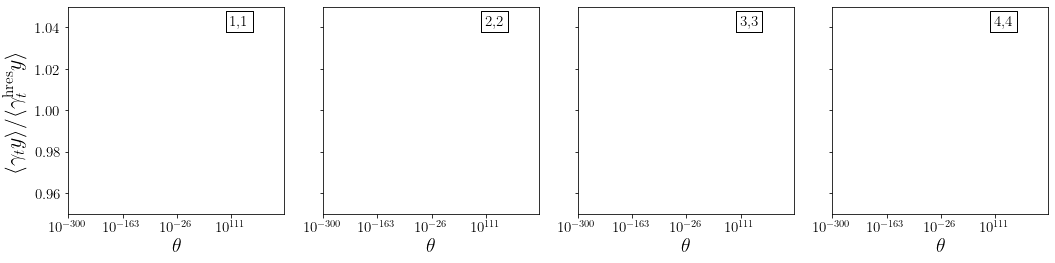

In [172]:
fdir = '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/results/'
# fnames = ['DV_obj_temp_gty_plancky3_beamed_nfw.pk','save_shear_shear_real_halofit.fits']
# fnames = ['DV_obj_temp_gty_plancky3_beamed_wmeadv4_20_mod_200c_bullock.pk','save_shear_shear_real_meadmodv4_20_al1.fits']

# fnames = ['DV_obj_temp_gty_plancky3_beamed_wmeadv4_20_mod_200c_bullock_imead1.pk','save_shear_shear_real_meadmodv4_20_imead1.fits']
# fnames = ['DV_obj_temp_gty_plancky3_beamed_wmeadv4_20_mod_nM128_imead1.pk','save_shear_shear_real_meadmodv4_20_imead1.fits']
# fnames = ['DV_obj_temp_gty_plancky3_beamed_wmeadv4_20_mod_nM128_nz64_imead1.pk','save_shear_shear_real_meadmodv4_20_imead1.fits']
fnames = ['DV_obj_temp_gty_plancky3_beamed_wmeadv4_20_mod_M8_17_nM50_nz180_imead1.pk','DV_obj_temp_gty_plancky3_beamed_wmeadv4_20_mod_M8_17_nM64_nz256_imead1.pk']

labels = ['y x code','Cosmosis']
colors = ['red','blue']
nbins = 4
bins = (np.arange(4) + 1).astype(int)
fig, ax = plt.subplots(1,4, figsize = (15,4),sharex=True,sharey='row')
jc = 0
texts_kk = [r'1,1',r'2,2',r'3,3',r'4,4']
texts_ky = [r'1,y',r'2,y',r'3,y',r'4,y']

for j2 in range(4):
    for jf in range(len(fnames)):
        tf_name = fdir + fnames[jf]

        DV = dill.load(open(tf_name,'rb'))
    
        if jf == 0:
            xi_yx = DV.xi_result_dict['gty']['bin_' + str(j2+1) + '_' + str(0)]
            th_yx = DV.xi_result_dict['kk']['theta']
            xi_yx_interp = interpolate.interp1d(np.log(th_yx),np.log(xi_yx),fill_value='extrapolate')
        else:
            xi_yx = DV.xi_result_dict['ky']['bin_' + str(j2+1) + '_' + str(0)]
            th_yx = DV.xi_result_dict['kk']['theta']

            xi_yx_thcos = np.exp(xi_yx_interp(np.log(th_yx)))

            ax[j2].errorbar(th_cos, xi_yx/xi_yx_thcos, ls='-',color=colors[jf])


#         ax[j2].set_ylim(1e-11,2e-9)



        ax[j2].set_xscale('log')
#         ax[j2].set_yscale('log')


        ax[j2].set_xlabel(r'$\theta$', size = 20)
#         ticks  = np.array([1,3,10,50,200])
#         labels_bottom = ticks
#         ax[j2].set_xticks(ticks)
#         ax[j2].set_xticklabels(labels_bottom,  fontsize=15)

        ax[j2].tick_params(axis='both', which='minor', labelsize=15)    
        ax[j2].tick_params(axis='both', which='major', labelsize=15)
#         ax[0,0].legend(fontsize = 18, frameon = False)
#         ax[j2].set_xlim((1.0,10000))
        ax[j2].set_ylim((0.95,1.05))

#         ax[j1,j2].text( 0.55, 0.96,labels[jc], verticalalignment='top', horizontalalignment='left', transform=ax[j1,j2].transAxes, fontsize=15)
        ax[j2].text( 0.75, 0.96,texts_kk[j2], verticalalignment='top', horizontalalignment='left', transform=ax[j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    
#         ax[j2].text( 0.75, 0.96,texts_ky[j2], verticalalignment='top', horizontalalignment='left', transform=ax[j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    
#         ax[2,j2].text( 0.75, 0.96,texts_kk[j2], verticalalignment='top', horizontalalignment='left', transform=ax[2,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))


        jc += 1

# yticks  = np.array([-0.45,-0.3,-0.15,0.00,0.15,0.3,0.45])
# labels_bottom = yticks
# ax[0,0].set_yticks(yticks)
# ax[0,0].set_yticklabels(labels_bottom,  fontsize=15)
# ax[1,0].set_yticks(yticks)
# ax[1,0].set_yticklabels(labels_bottom,  fontsize=15)


# ax[0,0].set_ylabel(r'$\xi_{\rm mm}$ comparison', size = 22)
ax[0].set_ylabel(r'$\langle \gamma_t y \rangle/\langle \gamma^{\rm hres}_t y \rangle$ ', size = 22)
# ax[1,0].set_ylabel(r'$\xi_{y\kappa}(\theta)$ ', size = 22)
# ax[2,0].set_ylabel(r'$\xi_{\kappa \kappa}(\theta)$ ', size = 22)
# ax[3].legend(fontsize=16,loc='lower left')
#     ax[1,j].tick_params(axis='both', which='major', labelsize=15)



plt.tight_layout()

# fig.savefig('xiplus_kk_comp_mead_ratio.pdf')









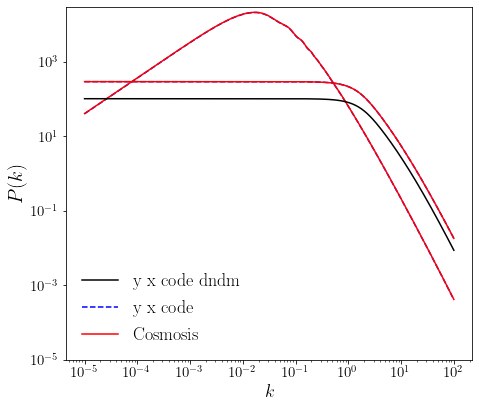

In [100]:
pkmm_yx = dill.load(open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/results/Pkmmdict_yx_rbvs_dndm_imead0.pk','rb'))
pkmm_cs = dill.load(open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/results/Pkmmdict_cosmosis_imead0.pk','rb'))





from scipy import interpolate
zv = 0.2
ind_zv_yx = np.where(pkmm_yx['z'] > zv)[0][0]
ind_zv_cs = np.where(pkmm_cs['z'] > zv)[0][0]


Pk1h_cs_interp = interpolate.interp1d(pkmm_cs['k'],pkmm_cs['Pk1h'][ind_zv_cs,:])
Pk2h_cs_interp = interpolate.interp1d(pkmm_cs['k'],pkmm_cs['Pk2h'][ind_zv_cs,:])



fig, ax = plt.subplots(1,1, figsize = (7,6))

ax.errorbar(pkmm_yx['k'],pkmm_yx['Pk2h'][ind_zv_yx,:],ls='--',marker='',elinewidth=2.0,color='blue')
ax.errorbar(pkmm_yx['k'],Pk2h_cs_interp(pkmm_yx['k']),ls='-',marker='',elinewidth=2.0,color='red')


ax.errorbar(pkmm_yx['k'],pkmm_yx['Pk1h'][ind_zv_yx,:],label=r'y x code dndm',ls='-',marker='',elinewidth=2.0,color='black')
ax.errorbar(pkmm_yx['k'],pkmm_yx['Pk1h_block'][ind_zv_yx,:],label=r'y x code',ls='--',marker='',elinewidth=2.0,color='blue')
ax.errorbar(pkmm_yx['k'],Pk1h_cs_interp(pkmm_yx['k']),label=r'Cosmosis',ls='-',marker='',elinewidth=2.0,color='red')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$k$', size = 18)
ax.set_ylabel(r'$P(k)$', size = 20)
ax.set_ylim(1e-5,3e4)
# ax.set_xlim(0.0,1.0)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='minor', labelsize=15)
ax.legend(fontsize = 18, frameon = False)
plt.tight_layout()











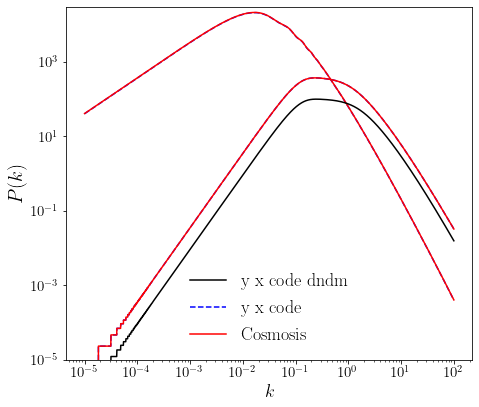

In [107]:
pkmm_yx = dill.load(open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/results/Pkmmdict_yx_rbvs_dndm_imead1.pk','rb'))
pkmm_cs = dill.load(open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/results/Pkmmdict_cosmosis_imead1.pk','rb'))


from scipy import interpolate
zv = 0.2
ind_zv_yx = np.where(pkmm_yx['z'] > zv)[0][0]
ind_zv_cs = np.where(pkmm_cs['z'] > zv)[0][0]


Pk1h_cs_interp = interpolate.interp1d(pkmm_cs['k'],pkmm_cs['Pk1h'][ind_zv_cs,:])
Pk2h_cs_interp = interpolate.interp1d(pkmm_cs['k'],pkmm_cs['Pk2h'][ind_zv_cs,:])



fig, ax = plt.subplots(1,1, figsize = (7,6))

ax.errorbar(pkmm_yx['k'],pkmm_yx['Pk2h'][ind_zv_yx,:],ls='--',marker='',elinewidth=2.0,color='blue')
ax.errorbar(pkmm_yx['k'],Pk2h_cs_interp(pkmm_yx['k']),ls='-',marker='',elinewidth=2.0,color='red')


ax.errorbar(pkmm_yx['k'],pkmm_yx['Pk1h'][0][ind_zv_yx,:],label=r'y x code dndm',ls='-',marker='',elinewidth=2.0,color='black')
ax.errorbar(pkmm_yx['k'],pkmm_yx['Pk1h_block'][ind_zv_yx,:],label=r'y x code',ls='--',marker='',elinewidth=2.0,color='blue')
ax.errorbar(pkmm_yx['k'],Pk1h_cs_interp(pkmm_yx['k']),label=r'Cosmosis',ls='-',marker='',elinewidth=2.0,color='red')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$k$', size = 18)
ax.set_ylabel(r'$P(k)$', size = 20)
ax.set_ylim(1e-5,3e4)
# ax.set_xlim(0.0,1.0)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='minor', labelsize=15)
ax.legend(fontsize = 18, frameon = False)
plt.tight_layout()













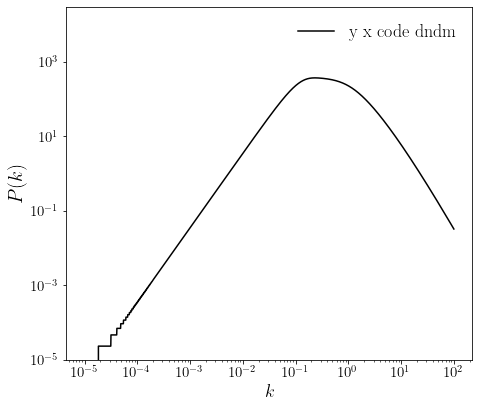

In [114]:


pkmm_yx = dill.load(open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/results/Pkmmdict_yx_rbvs_dndm_imead1.pk','rb'))
pkmm_yx2 = dill.load(open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/results/Pkmmdict_yx_rbvs_dndm_imead1_um_interp.pk','rb'))
pkmm_cs = dill.load(open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/results/Pkmmdict_cosmosis_imead1.pk','rb'))


from scipy import interpolate
zv = 0.2
ind_zv_yx = np.where(pkmm_yx['z'] > zv)[0][0]
ind_zv_cs = np.where(pkmm_cs['z'] > zv)[0][0]


Pk1h_cs_interp = interpolate.interp1d(pkmm_cs['k'],pkmm_cs['Pk1h'][ind_zv_cs,:])
Pk2h_cs_interp = interpolate.interp1d(pkmm_cs['k'],pkmm_cs['Pk2h'][ind_zv_cs,:])



fig, ax = plt.subplots(1,1, figsize = (7,6))

# ax.errorbar(pkmm_yx['k'],pkmm_yx['Pk2h'][ind_zv_yx,:],ls='--',marker='',elinewidth=2.0,color='blue')
# ax.errorbar(pkmm_yx['k'],Pk2h_cs_interp(pkmm_yx['k']),ls='-',marker='',elinewidth=2.0,color='red')


ax.errorbar(pkmm_yx['k'],pkmm_yx2['Pk1h_block'][ind_zv_yx,:],label=r'y x code dndm',ls='-',marker='',elinewidth=2.0,color='black')
ax.errorbar(pkmm_yx['k'],pkmm_yx['Pk1h_block'][ind_zv_yx,:],label=r'y x code',ls='--',marker='',elinewidth=2.0,color='blue')
ax.errorbar(pkmm_yx['k'],Pk1h_cs_interp(pkmm_yx['k']),label=r'Cosmosis',ls='-',marker='',elinewidth=2.0,color='red')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$k$', size = 18)
ax.set_ylabel(r'$P(k)$', size = 20)
ax.set_ylim(1e-5,3e4)
# ax.set_xlim(0.0,1.0)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='minor', labelsize=15)
ax.legend(fontsize = 18, frameon = False)
plt.tight_layout()






In [106]:
np.array(pkmm_yx['Pk1h']).shape


(2, 101, 2000)

In [191]:
Pk1h_cs_interp(pkmm_yx['k'])


array([1.03720245e+02, 1.03720215e+02, 1.03720230e+02, ...,
       1.15651786e-02, 1.13197314e-02, 1.10789193e-02])

In [194]:
pkmm_yx['Pk1h'][ind_zv_yx,:]



array([7.47982443e+01, 7.47982377e+01, 7.47982441e+01, ...,
       1.11066877e-02, 1.08721772e-02, 1.06421962e-02])

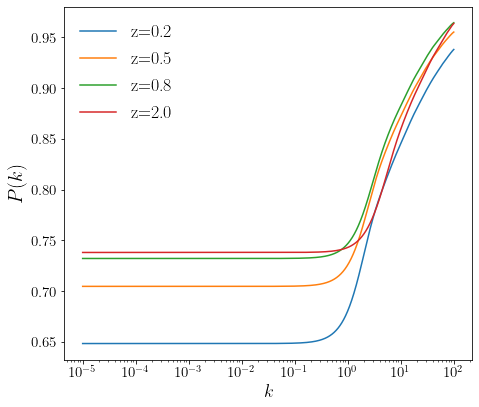

In [9]:
from scipy import interpolate
zv_all = [0.2,0.5,0.8,2.0]
fig, ax = plt.subplots(1,1, figsize = (7,6))
for zv in zv_all:
    ind_zv_yx = np.where(pkmm_yx['z'] > zv)[0][0]
    ind_zv_cs = np.where(pkmm_cs['z'] > zv)[0][0]

    Pk1h_cs_interp = interpolate.interp1d(pkmm_cs['k'],pkmm_cs['Pk1h'][ind_zv_cs,:])
    Pk2h_cs_interp = interpolate.interp1d(pkmm_cs['k'],pkmm_cs['Pk2h'][ind_zv_cs,:])

    ax.errorbar(pkmm_yx['k'],pkmm_yx['Pk1h'][ind_zv_yx,:]/Pk1h_cs_interp(pkmm_yx['k']),ls='-',marker='',elinewidth=2.0,label=r'z=' + str(zv) )

ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_xlabel(r'$k$', size = 18)
ax.set_ylabel(r'$P(k)$', size = 20)
# ax.set_ylim(1e-18,1e-10)
# ax.set_xlim(0.0,1.0)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='minor', labelsize=15)
ax.legend(fontsize = 18, frameon = False)
plt.tight_layout()












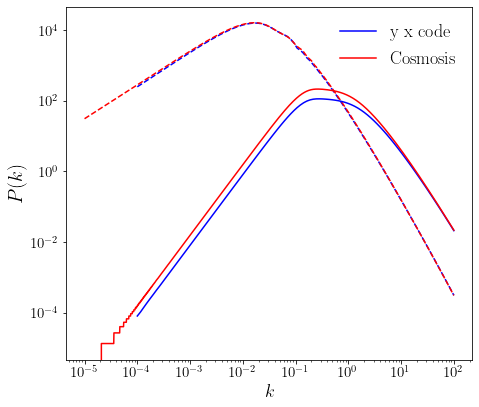

In [44]:
from scipy import interpolate
zv = 0.46
ind_zv_yx = np.where(pkmm_yx['z'] > zv)[0][0]
ind_zv_cs = np.where(pkmm_cs['z'] > zv)[0][0]


Pk1h_cs_interp = interpolate.interp1d(pkmm_cs['k'],pkmm_cs['Pk1h'][ind_zv_cs,:])
Pk2h_cs_interp = interpolate.interp1d(pkmm_cs['k'],pkmm_cs['Pk1h'][ind_zv_cs,:])



fig, ax = plt.subplots(1,1, figsize = (7,6))

ax.errorbar(pkmm_yx['k'],pkmm_yx['Pk2h'][ind_zv_yx,:],ls='--',marker='',elinewidth=2.0,color='blue')
ax.errorbar(pkmm_cs['k'],pkmm_cs['Pk2h'][ind_zv_cs,:],ls='--',marker='',elinewidth=2.0,color='red')


ax.errorbar(pkmm_yx['k'],pkmm_yx['Pk1h'][ind_zv_yx,:],label=r'y x code',ls='-',marker='',elinewidth=2.0,color='blue')
ax.errorbar(pkmm_cs['k'],pkmm_cs['Pk1h'][ind_zv_cs,:],label=r'Cosmosis',ls='-',marker='',elinewidth=2.0,color='red')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$k$', size = 18)
ax.set_ylabel(r'$P(k)$', size = 20)
# ax.set_ylim(1e-18,1e-10)
# ax.set_xlim(0.0,1.0)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='minor', labelsize=15)
ax.legend(fontsize = 18, frameon = False)
plt.tight_layout()







In [32]:
import colossus
from colossus.cosmology import cosmology
from colossus.lss import bias
from colossus.lss import mass_function
from colossus.halo import mass_so
from colossus.halo import mass_defs
from colossus.halo import concentration

cosmo_params = {'flat': True, 'H0': 67.31, 'Om0': 0.315, 'Ob0': 0.044, 'sigma8': 0.87286, 'ns': 0.96, 'relspecies': False}

cosmology.addCosmology('mock_cosmo', cosmo_params)
cosmo_colossus = cosmology.setCosmology('mock_cosmo')






In [39]:
cosmo_colossus.rho_m(0.0)



87.42403758239803

In [41]:
(2.775e11)*0.315



87412500000.0

In [48]:
dndmdict = dill.load(open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/results/dndmdict_comp_interp.pk','rb'))

z_yx = dndmdict['z_yx']
z_array_block = dndmdict['z_block']

zv = 0.67
ind_zv_yx = np.where(z_yx > zv)[0][0]
ind_zv_cs = np.where(z_array_block > zv)[0][0]

M_yx = dndmdict['M_yx']
dndm_yx = dndmdict['dndm_yx'][ind_zv_yx,:]
nu_block = dndmdict['nu_block'][ind_zv_cs,:]
gm_block = dndmdict['gm_block'][ind_zv_cs,:]
M_block = dndmdict['M_block'][ind_zv_cs,:]
sigma_block = dndmdict['sigma_block'][ind_zv_cs,:]


In [49]:
R = peaks.lagrangianR(M_block)
sigma_cl = cosmo_colossus.sigma(R, z_array_block[ind_zv_cs])



In [50]:
from colossus.lss import peaks
nu_cl = peaks.peakHeight(M_block,z_array_block[ind_zv_cs])

nu_cl2 = 1.686/sigma_cl




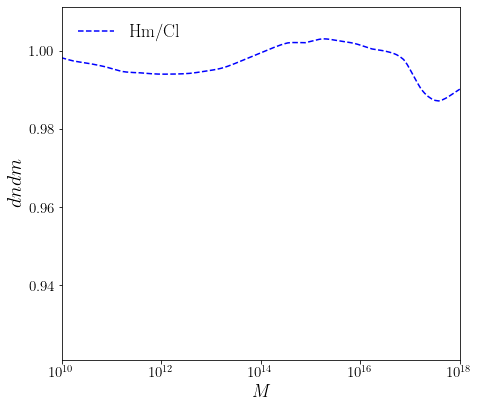

In [51]:
fig, ax = plt.subplots(1,1, figsize = (7,6))

ax.errorbar(M_block, sigma_cl/(sigma_block),ls='--',marker='',elinewidth=2.0,color='blue',label='Hm/Cl')
# ax.errorbar(M_block,fv_cl,ls='--',marker='',elinewidth=2.0,color='red',label='Cl')

ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_xlabel(r'$M$', size = 18)
ax.set_ylabel(r'$dndm$', size = 20)
# ax.set_ylim(1e-40,1e-10)
ax.set_xlim(1e10,1e18)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='minor', labelsize=15)
ax.legend(fontsize = 18, frameon = False)
plt.tight_layout()



In [52]:
p=0.3
a=0.707
bigA=0.21616

gst_bl=bigA*(1.+((a*nu_block*nu_block)**(-p)))*np.exp(-a*nu_block*nu_block/2.)


A = 0.3222
a = 0.707
p = 0.3

nu_p = a * (nu_block**2)
gst_cl = A * np.sqrt(nu_p * 2.0 / np.pi) * np.exp(-0.5 * nu_p) * (1.0 + nu_p**-p)


nu_p = a * (nu_cl**2)
gst_cl2 = A * np.sqrt(nu_p * 2.0 / np.pi) * np.exp(-0.5 * nu_p) * (1.0 + nu_p**-p)



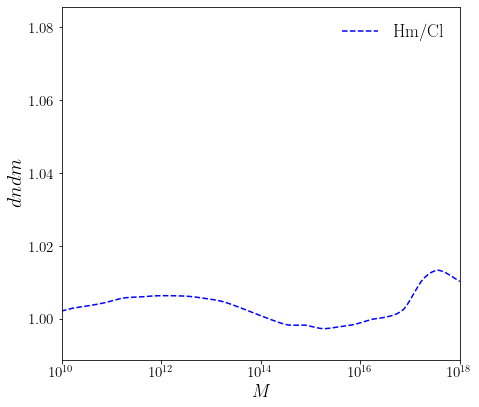

In [53]:
fig, ax = plt.subplots(1,1, figsize = (7,6))

ax.errorbar(M_block, nu_cl/(nu_block),ls='--',marker='',elinewidth=2.0,color='blue',label='Hm/Cl')
# ax.errorbar(M_block,fv_cl,ls='--',marker='',elinewidth=2.0,color='red',label='Cl')

ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_xlabel(r'$M$', size = 18)
ax.set_ylabel(r'$dndm$', size = 20)
# ax.set_ylim(1e-40,1e-10)
ax.set_xlim(1e10,1e18)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='minor', labelsize=15)
ax.legend(fontsize = 18, frameon = False)
plt.tight_layout()



/global/u1/s/spandey/self_module_ini/myenv3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


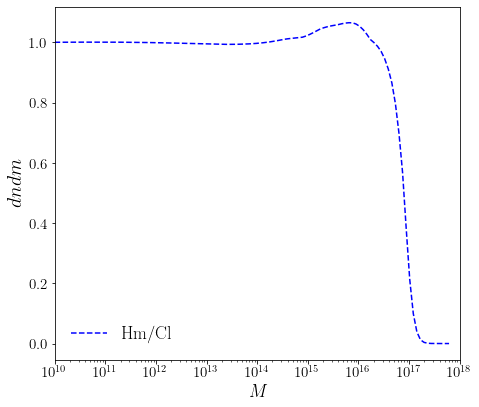

In [54]:
fig, ax = plt.subplots(1,1, figsize = (7,6))

ax.errorbar(M_block, gst_cl2/(gst_cl),ls='--',marker='',elinewidth=2.0,color='blue',label='Hm/Cl')
# ax.errorbar(M_block,fv_cl,ls='--',marker='',elinewidth=2.0,color='red',label='Cl')

ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_xlabel(r'$M$', size = 18)
ax.set_ylabel(r'$dndm$', size = 20)
# ax.set_ylim(1e-40,1e-10)
ax.set_xlim(1e10,1e18)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='minor', labelsize=15)
ax.legend(fontsize = 18, frameon = False)
plt.tight_layout()







/global/u1/s/spandey/self_module_ini/myenv3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


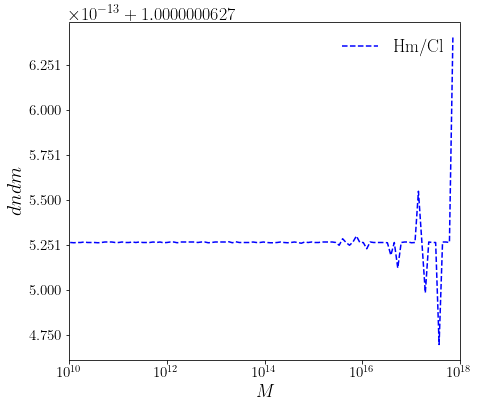

In [48]:
fig, ax = plt.subplots(1,1, figsize = (7,6))

ax.errorbar(M_block, nu_block*gst_bl/(gst_cl),ls='--',marker='',elinewidth=2.0,color='blue',label='Hm/Cl')
# ax.errorbar(M_block,fv_cl,ls='--',marker='',elinewidth=2.0,color='red',label='Cl')

ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_xlabel(r'$M$', size = 18)
ax.set_ylabel(r'$dndm$', size = 20)
# ax.set_ylim(1e-40,1e-10)
ax.set_xlim(1e10,1e18)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='minor', labelsize=15)
ax.legend(fontsize = 18, frameon = False)
plt.tight_layout()






In [55]:
A = 0.3222
a = 0.707
p = 0.3

nu_p = a * (nu_block**2)
gst_cl = A * np.sqrt(nu_p * 2.0 / np.pi) * np.exp(-0.5 * nu_p) * (1.0 + nu_p**-p)

fv_cl =  mass_function.massFunction(M_block,z_array_block[ind_zv_cs] ,
                                                                  mdef='fof', model='sheth99',
                                                                  q_out='f')


fv_cl_nu =  mass_function.massFunction(nu_block,z_array_block[ind_zv_cs] ,
                                                                  mdef='fof', model='sheth99',
                                                                  q_out='f',q_in='nu')






In [56]:
dndm_cl_nu = (M_block)* mass_function.massFunction(nu_block,z_array_block[ind_zv_cs] ,
                                                                  mdef='fof', model='sheth99',
                                                                  q_out='dndlnM',q_in='nu')




/global/u1/s/spandey/self_module_ini/myenv3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/global/u1/s/spandey/self_module_ini/myenv3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


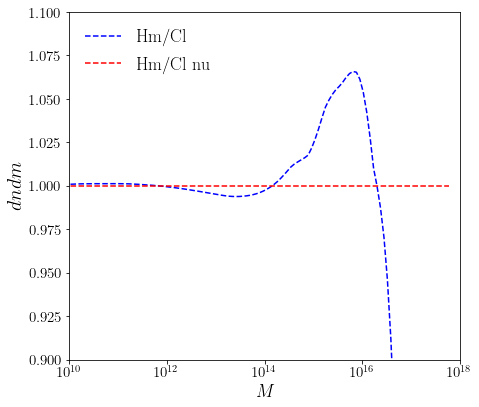

In [58]:
fig, ax = plt.subplots(1,1, figsize = (7,6))

ax.errorbar(M_block, fv_cl/(gst_cl),ls='--',marker='',elinewidth=2.0,color='blue',label='Hm/Cl')
ax.errorbar(M_block, fv_cl_nu/(gst_cl),ls='--',marker='',elinewidth=2.0,color='red',label='Hm/Cl nu')
# ax.errorbar(M_block,fv_cl,ls='--',marker='',elinewidth=2.0,color='red',label='Cl')

ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_xlabel(r'$M$', size = 18)
ax.set_ylabel(r'$dndm$', size = 20)
ax.set_ylim(0.9,1.1)
ax.set_xlim(1e10,1e18)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='minor', labelsize=15)
ax.legend(fontsize = 18, frameon = False)
plt.tight_layout()







/global/u1/s/spandey/self_module_ini/myenv3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


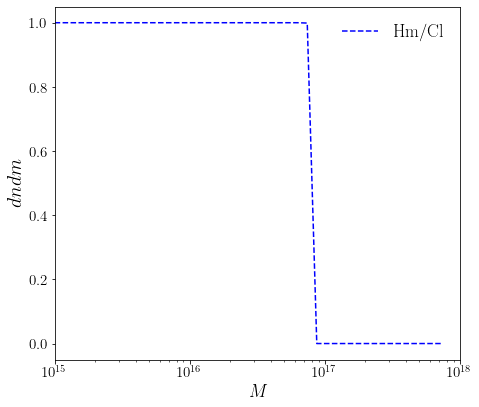

In [38]:
fig, ax = plt.subplots(1,1, figsize = (7,6))

ax.errorbar(M_block, gm_block/gst_bl,ls='--',marker='',elinewidth=2.0,color='blue',label='Hm/Cl')
# ax.errorbar(M_block,fv_cl,ls='--',marker='',elinewidth=2.0,color='red',label='Cl')

ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_xlabel(r'$M$', size = 18)
ax.set_ylabel(r'$dndm$', size = 20)
# ax.set_ylim(1e-40,1e-10)
ax.set_xlim(1e15,1e18)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='minor', labelsize=15)
ax.legend(fontsize = 18, frameon = False)
plt.tight_layout()






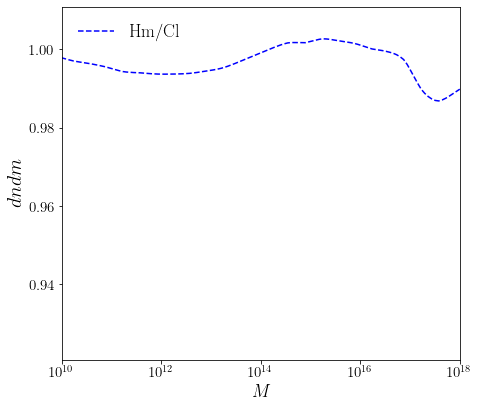

In [59]:
fig, ax = plt.subplots(1,1, figsize = (7,6))

ax.errorbar(M_block, nu_block/nu_cl,ls='--',marker='',elinewidth=2.0,color='blue',label='Hm/Cl')
# ax.errorbar(M_block,fv_cl,ls='--',marker='',elinewidth=2.0,color='red',label='Cl')

ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_xlabel(r'$M$', size = 18)
ax.set_ylabel(r'$dndm$', size = 20)
# ax.set_ylim(1e-40,1e-10)
ax.set_xlim(1e10,1e18)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='minor', labelsize=15)
ax.legend(fontsize = 18, frameon = False)
plt.tight_layout()





/global/u1/s/spandey/self_module_ini/myenv3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/global/u1/s/spandey/self_module_ini/myenv3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


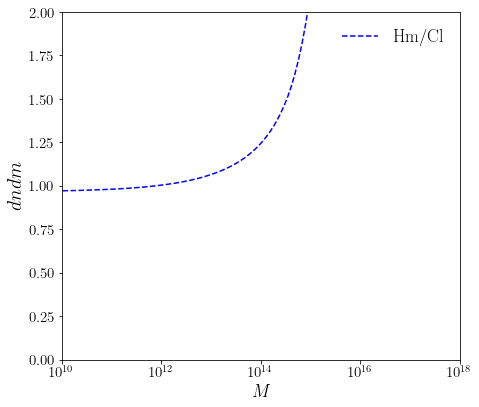

In [57]:
fig, ax = plt.subplots(1,1, figsize = (7,6))

ax.errorbar(M_block, nu_block*gst_bl/(fv_cl),ls='--',marker='',elinewidth=2.0,color='blue',label='Hm/Cl')
# ax.errorbar(M_block,2.*nu_cl*fv_cl,ls='--',marker='',elinewidth=2.0,color='red',label='Cl')
# ax.errorbar(M_block, gm_block,ls='--',marker='',elinewidth=2.0,color='blue',label='Hm')

ax.set_xscale('log')

# ax.set_yscale('log')
ax.set_xlabel(r'$M$', size = 18)
ax.set_ylabel(r'$dndm$', size = 20)
ax.set_ylim(0,2)
ax.set_xlim(1e10,1e18)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='minor', labelsize=15)
ax.legend(fontsize = 18, frameon = False)
plt.tight_layout()



 
                                 





In [51]:
cosmo = cosmology.getCurrent()
R = peaks.lagrangianR(M_block)
d_ln_sigma_d_ln_R = cosmo.sigma(R, z_array_block[ind_zv_cs] , derivative = True)



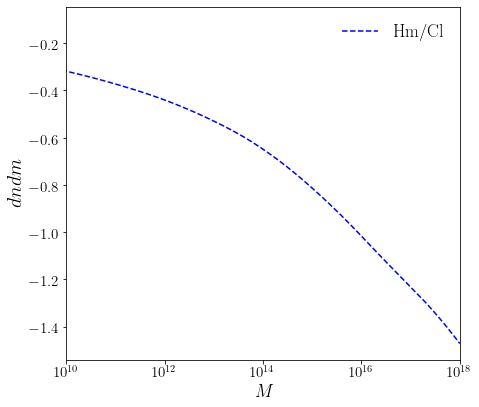

In [54]:
fig, ax = plt.subplots(1,1, figsize = (7,6))

ax.errorbar(M_block, d_ln_sigma_d_ln_R,ls='--',marker='',elinewidth=2.0,color='blue',label='Hm/Cl')
# ax.errorbar(M_block,2.*nu_cl*fv_cl,ls='--',marker='',elinewidth=2.0,color='red',label='Cl')
# ax.errorbar(M_block, gm_block,ls='--',marker='',elinewidth=2.0,color='blue',label='Hm')

ax.set_xscale('log')

# ax.set_yscale('log')
ax.set_xlabel(r'$M$', size = 18)
ax.set_ylabel(r'$dndm$', size = 20)
# ax.set_ylim(1e-40,1e-10)
ax.set_xlim(1e10,1e18)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='minor', labelsize=15)
ax.legend(fontsize = 18, frameon = False)
plt.tight_layout()



 
                                 






In [3]:
z_yx[ind_zv_yx] - z_array_block[ind_zv_cs]



0.055686209082983384

In [60]:
# mdef = 'fof'
# dndm_model = 'sheth99'
# dndm_yx = (1. / M_yx) * mass_function.massFunction(M_yx, zv,mdef=mdef, model=dndm_model,q_out='dndlnM')




In [61]:

rho_m = (2.775e11)*0.315

sp.integrate.simps( (M_yx/rho_m) * dndm_yx, M_yx) 

                  
                   

0.690847915723576

In [62]:
import scipy.integrate as integrate



In [63]:
integrate.simps( gm_block*nu_block, nu_block) 




0.6162547025067762

In [64]:
# dnu_dM = (nu_block[1:] - nu_block[:-1])/(M_block[1:] - M_block[:-1])
# gm_pl = (gm_block[1:] + gm_block[:-1])/2.
# M_pl = (M_block[1:] + M_block[:-1])/2.


gm_pl = np.exp((np.log(gm_block[1:]) + np.log(gm_block[:-1]))/2.)
M_pl = np.exp((np.log(M_block[1:]) + np.log(M_block[:-1]))/2.)
nu_pl = np.exp((np.log(nu_block[1:]) + np.log(nu_block[:-1]))/2.)
dnu_dM = (nu_pl/M_pl)*(np.log(nu_block[1:]) - np.log(nu_block[:-1]))/(np.log(M_block[1:]) - np.log(M_block[:-1]))



/global/u1/s/spandey/self_module_ini/myenv3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


In [65]:
(0.322)*(np.sqrt(0.707*2/np.pi))



0.21602580893508844

In [66]:
import scipy.interpolate as interpolate
gpl_interp = interpolate.interp1d(np.log(M_pl),np.log(gm_pl*dnu_dM*(1./nu_pl)),fill_value='extrapolate')
gpl_yx = np.exp(gpl_interp(np.log(M_yx)))



/global/u1/s/spandey/self_module_ini/myenv3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/global/homes/s/spandey/.local/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:609: RuntimeWarning: invalid value encountered in subtract
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]


In [67]:
dndlnm_cl_nu =  mass_function.massFunction(nu_block,z_array_block[ind_zv_cs] ,
                                                                  mdef='fof', model='sheth99',
                                                                  q_out='dndlnM',q_in='nu')





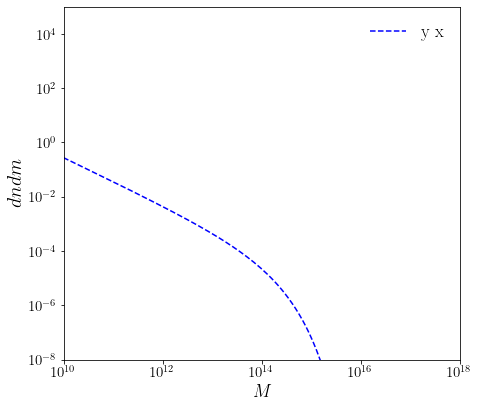

In [68]:
fig, ax = plt.subplots(1,1, figsize = (7,6))

ax.errorbar(M_block, dndlnm_cl_nu,ls='--',marker='',elinewidth=2.0,color='blue',label='y x')


ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$M$', size = 18)
ax.set_ylabel(r'$dndm$', size = 20)
ax.set_ylim(1e-8,1e5)
ax.set_xlim(1e10,1e18)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='minor', labelsize=15)
ax.legend(fontsize = 18, frameon = False)
plt.tight_layout()







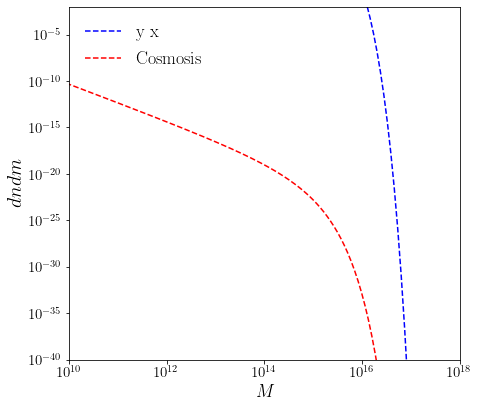

In [69]:
fig, ax = plt.subplots(1,1, figsize = (7,6))

ax.errorbar(M_block, dndm_cl_nu,ls='--',marker='',elinewidth=2.0,color='blue',label='y x')
ax.errorbar(M_pl,(gm_pl/nu_pl)*dnu_dM * (rho_m/M_pl),ls='--',marker='',elinewidth=2.0,color='red',label='Cosmosis')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$M$', size = 18)
ax.set_ylabel(r'$dndm$', size = 20)
ax.set_ylim(1e-40,1e-2)
ax.set_xlim(1e10,1e18)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='minor', labelsize=15)
ax.legend(fontsize = 18, frameon = False)
plt.tight_layout()






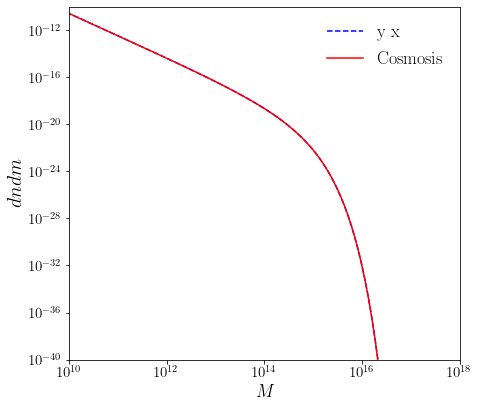

In [77]:
fig, ax = plt.subplots(1,1, figsize = (7,6))

ax.errorbar(M_yx, dndm_yx,ls='--',marker='',elinewidth=2.0,color='blue',label='y x')
ax.errorbar(M_pl,(gm_pl)*dnu_dM * (rho_m/M_pl),ls='-',marker='',elinewidth=2.0,color='red',label='Cosmosis')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$M$', size = 18)
ax.set_ylabel(r'$dndm$', size = 20)
ax.set_ylim(1e-40,1e-10)
ax.set_xlim(1e10,1e18)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='minor', labelsize=15)
ax.legend(fontsize = 18, frameon = False)
plt.tight_layout()






/global/u1/s/spandey/self_module_ini/myenv3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


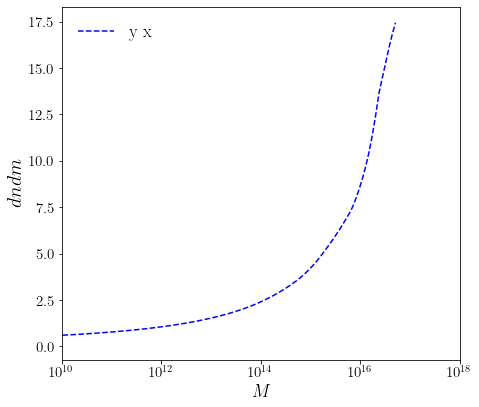

In [74]:
fig, ax = plt.subplots(1,1, figsize = (7,6))

ax.errorbar(M_yx,(dndm_yx)/((gpl_yx) * (rho_m/M_yx)),ls='--',marker='',elinewidth=2.0,color='blue',label='y x')
# ax.errorbar(M_pl,gm_pl*dnu_dM,ls='--',marker='',elinewidth=2.0,color='red',label='Cosmosis')

ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_xlabel(r'$M$', size = 18)
ax.set_ylabel(r'$dndm$', size = 20)
# ax.set_ylim(1e-40,1e-10)
ax.set_xlim(1e10,1e18)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='minor', labelsize=15)
ax.legend(fontsize = 18, frameon = False)
plt.tight_layout()







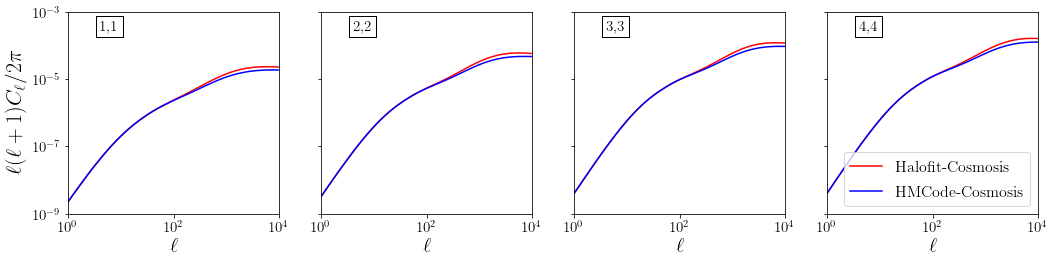

In [8]:



fdir = '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/results/'
# fnames = ['DV_obj_temp_gty_plancky3_beamed_nfw.pk','save_shear_shear_fourier_halofit.fits']
fnames = ['save_shear_shear_fourier_halofit.fits','save_shear_shear_fourier_meadmodv4_20_al1.fits']
labels = ['Halofit-Cosmosis','HMCode-Cosmosis']
colors = ['red','blue']
nbins = 4
bins = (np.arange(4) + 1).astype(int)
fig, ax = plt.subplots(1,4, figsize = (15,4),sharex=True,sharey='row')
jc = 0
texts_kk = [r'1,1',r'2,2',r'3,3',r'4,4']
texts_ky = [r'1,y',r'2,y',r'3,y',r'4,y']

for jf in range(len(fnames)):
    tf_name = fdir + fnames[jf]

    df = fits.open(tf_name)
    bin1 = df['xip'].data['BIN1']
    bin2 = df['xip'].data['BIN2']
    value = df['xip'].data['VALUE']
    angle = df['xip'].data['ANG']

 
    for j2 in range(4):

        ind_sel = np.where((bin1 == j2+1) & (bin2 == j2+1))[0]
        Cl_val = value[ind_sel]
        ell_val = angle[ind_sel]

        ax[j2].errorbar(ell_val, (ell_val)*(ell_val)*Cl_val/(2*np.pi), ls='-',color=colors[jf],label=labels[jf])


#         ax[j2].set_ylim(1e-11,2e-9)



        ax[j2].set_xscale('log')
        ax[j2].set_yscale('log')


        ax[j2].set_xlabel(r'$\ell$', size = 20)
#         ticks  = np.array([1,3,10,50,200])
#         labels_bottom = ticks
#         ax[j2].set_xticks(ticks)
#         ax[j2].set_xticklabels(labels_bottom,  fontsize=15)

        ax[j2].tick_params(axis='both', which='minor', labelsize=15)    
        ax[j2].tick_params(axis='both', which='major', labelsize=15)
#         ax[0,0].legend(fontsize = 18, frameon = False)
        ax[j2].set_xlim((1.0,10000))
        ax[j2].set_ylim((1e-9,1e-3))

#         ax[j1,j2].text( 0.55, 0.96,labels[jc], verticalalignment='top', horizontalalignment='left', transform=ax[j1,j2].transAxes, fontsize=15)
        ax[j2].text( 0.15, 0.96,texts_kk[j2], verticalalignment='top', horizontalalignment='left', transform=ax[j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    
#         ax[j2].text( 0.75, 0.96,texts_ky[j2], verticalalignment='top', horizontalalignment='left', transform=ax[j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    
#         ax[2,j2].text( 0.75, 0.96,texts_kk[j2], verticalalignment='top', horizontalalignment='left', transform=ax[2,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))


        jc += 1

# yticks  = np.array([-0.45,-0.3,-0.15,0.00,0.15,0.3,0.45])
# labels_bottom = yticks
# ax[0,0].set_yticks(yticks)
# ax[0,0].set_yticklabels(labels_bottom,  fontsize=15)
# ax[1,0].set_yticks(yticks)
# ax[1,0].set_yticklabels(labels_bottom,  fontsize=15)


# ax[0,0].set_ylabel(r'$\xi_{\rm mm}$ comparison', size = 22)
ax[0].set_ylabel(r'$\ell (\ell+1) C_{\ell}/2\pi$ ', size = 22)
# ax[1,0].set_ylabel(r'$\xi_{y\kappa}(\theta)$ ', size = 22)
# ax[2,0].set_ylabel(r'$\xi_{\kappa \kappa}(\theta)$ ', size = 22)
ax[3].legend(fontsize=16,loc='lower right')
#     ax[1,j].tick_params(axis='both', which='major', labelsize=15)



plt.tight_layout()

# fig.savefig('Cl_kk_comp_mead.pdf')


    









In [20]:
filename = '/global/cfs/cdirs/des/shivamp/cosmosis/ACTxDESY3/src/chains/chain_bP_linear_yshear_planckxdesy3_emcee.txt'
data = np.loadtxt(filename)

ntot = data.shape[0]
ind_sel = np.random.randint(0,ntot, 1000)




In [42]:
# ind_bf = np.where(data[ind_sel,-1] == np.max(data[ind_sel,-1]))[0]
# print(ind_bf)
# print(data[ind_bf,:])

# ind_bf = np.where(data[:,-1] == np.max(data[:,-1]))[0]
# print(ind_bf)
# print(data[ind_bf,:])


[799]
[[  1.27180854   2.2955644   -2.7080502  -16.11498816]]


In [23]:
bpz0 = data[ind_sel,0]
bp_alpha = data[ind_sel,1]

z_array = np.linspace(0,1,100)

z_vlj = 0.15
bp_vlj = 1.5135
bp_vlj_yp = 1.72972
bp_vlj_yn = 1.28378

z_des = np.array([0.23915211970074815,0.38204488778054857,0.5256857855361595,0.6783042394014961])
bp_des = np.array([1.5135135135135136,2.472972972972973,3.851351351351351,2.6148648648648645])
bp_des_p = np.array([2.0270,3.04729,4.6351,3.9729729])
bp_des_n = np.array([0.93918918,1.8918,2.95945,1.445945])



In [30]:
np.array([bp_des_p-bp_des,bp_des-bp_des_n]).T.shape


(4, 2)

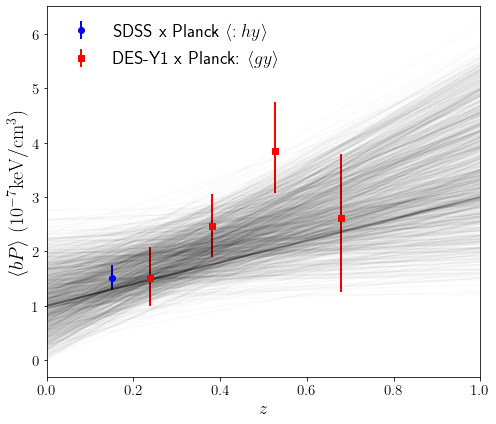

In [43]:
fig, ax = pl.subplots(1,1, figsize = (7,6))

for j in range(len(ind_sel)):
    bpzj = bpz0[j] + bp_alpha[j]*z_array
    ax.plot(z_array,  bpzj,alpha=0.02,color='black')
ax.errorbar(z_vlj,bp_vlj,yerr=np.array([[bp_vlj_yp-bp_vlj,bp_vlj-bp_vlj_yn]]).T,label=r'SDSS x Planck: $\langle hy \rangle$',ls='',marker='o',elinewidth=2.0,color='blue')
ax.errorbar(z_des,bp_des,yerr=np.array([bp_des_p-bp_des,bp_des-bp_des_n]),label=r'DES-Y1 x Planck: $\langle gy \rangle$',ls='',marker='s',elinewidth=2.0,color='red')
# ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_xlabel(r'$z$', size = 18)
ax.set_ylabel(r'$\langle bP \rangle $   $(10^{-7} {\rm keV}/{{\rm cm}^3})$', size = 20)
# ax.set_ylim(1e-18,1e-10)
ax.set_xlim(0.0,1.0)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='minor', labelsize=15)
ax.legend(fontsize = 18, frameon = False)
pl.tight_layout()














In [50]:
import pickle as pk
try:
    df = pk.load(open('/global/cfs/cdirs/des/shivamp/ACTxDESY3_data/actxdes_shear/planck_desy3_kk_gty_reformat_autobinonly_cov_theory.pk','rb'))
except:
    df = pk.load(open('/global/cfs/cdirs/des/shivamp/ACTxDESY3_data/actxdes_shear/planck_desy3_kk_gty_reformat_autobinonly_cov_theory.pk','rb'),encoding='latin1')

xi_gty_data = df['mean'][80:]
xi_gty_cov = df['cov_total'][80:,:][:,80:]
xi_gty_sig = np.sqrt(np.diag(xi_gty_cov))


In [51]:
thf = np.loadtxt('/global/cfs/cdirs/des/shivamp/cosmosis/ACTxDESY3/src/results/xi_gy_2h_bp.txt')
thf.shape


(20, 5)

In [52]:
df['xcoord_all']


(8, 20)

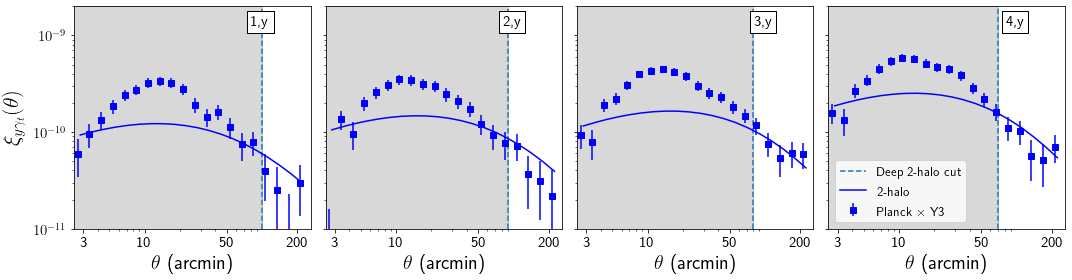

In [54]:
def QR_inverse(matrix):
    _Q,_R = np.linalg.qr(matrix)
    return np.dot(_Q,np.linalg.inv(_R.T))


# file_names = ['/global/cfs/cdirs/des/shivamp/ACTxDESY3_data/actxdes_shear/planck_desy3_kk_gty_reformat_autobinonly_cov_theory.pk',
# ]

# try:
#     df = pk.load(open('/global/cfs/cdirs/des/shivamp/ACTxDESY3_data/actxdes_shear/results.pkl','rb'))
# except:
#     df = pk.load(open('/global/cfs/cdirs/des/shivamp/ACTxDESY3_data/actxdes_shear/results.pkl','rb'),encoding='latin1')

nbins = 4
bins = (np.arange(4) + 1).astype(int)
fig, ax = pl.subplots(1,4, figsize = (15,4),sharex=True,sharey='row')
jc = 0
texts_kk = [r'1,1',r'2,2',r'3,3',r'4,4']
texts_ky = [r'1,y',r'2,y',r'3,y',r'4,y']
hline_array = [100.,90.,80,70]
for j1 in range(1):    
    for j2 in range(4):
        wtheta_ygt_1 = thf[:,j2+1]
        
        theta = thf[:,0]
    
        if j1 == 0:            
            ax[j2].errorbar(theta, wtheta_ygt_1, ls='-',color='b',label=r'2-halo')
            ax[j2].axvline(hline_array[j2],ls='--',label='Deep 2-halo cut')
            ax[j2].axvspan(0,hline_array[j2],color='gray',alpha=0.3)
#             ax[j2].errorbar(theta, wtheta_ygt_2, ls='-',color='k',label='B12/NFW')
#             ax[j2].errorbar(theta, wtheta_ygt_3, ls='-',color='r',label='LeBrun15 AGN8')

            yk_g = xi_gty_data[20*j2:20*(j2+1)]
            yk_th_g = df['xcoord_all'][j2,:]
            yk_err = xi_gty_sig[20*j2:20*(j2+1)]
            
#             yk_cov = df['Yshear_y3'][str(j2)]['cov']
#             inv_cov_bin = QR_inverse(yk_cov)
#             snr_bin = np.sqrt(np.dot(np.array([yk_g]), np.dot(inv_cov_bin, np.array([yk_g]).T)))
#             print('SNR y-gt Y3 bin' + str(j2+1)  + '=' + str(np.round(snr_bin[0][0],2)) + ' sigma')
            
            ax[j2].errorbar(yk_th_g, yk_g,yerr=yk_err, ls='',marker='s',color='blue',label=r'Planck $\times$ Y3')



            ax[j2].set_ylim(1e-11,2e-9)


        
        ax[j2].set_xscale('log')
        ax[j2].set_yscale('log')
        
        if j1 == 0:
            ax[j2].set_xlabel(r'$\theta$ (arcmin)', size = 20)
            ticks  = np.array([1,3,10,50,200])
            labels_bottom = ticks
            ax[j2].set_xticks(ticks)
            ax[j2].set_xticklabels(labels_bottom,  fontsize=15)
            
        ax[j2].tick_params(axis='both', which='minor', labelsize=15)    
        ax[j2].tick_params(axis='both', which='major', labelsize=15)
#         ax[0,0].legend(fontsize = 18, frameon = False)
        ax[j2].set_xlim((2.5,260))
        

#         ax[j1,j2].text( 0.55, 0.96,labels[jc], verticalalignment='top', horizontalalignment='left', transform=ax[j1,j2].transAxes, fontsize=15)
        ax[j2].text( 0.75, 0.96,texts_ky[j2], verticalalignment='top', horizontalalignment='left', transform=ax[j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    
        ax[j2].text( 0.75, 0.96,texts_ky[j2], verticalalignment='top', horizontalalignment='left', transform=ax[j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    
#         ax[2,j2].text( 0.75, 0.96,texts_kk[j2], verticalalignment='top', horizontalalignment='left', transform=ax[2,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))


        jc += 1

# yticks  = np.array([-0.45,-0.3,-0.15,0.00,0.15,0.3,0.45])
# labels_bottom = yticks
# ax[0,0].set_yticks(yticks)
# ax[0,0].set_yticklabels(labels_bottom,  fontsize=15)
# ax[1,0].set_yticks(yticks)
# ax[1,0].set_yticklabels(labels_bottom,  fontsize=15)


# ax[0,0].set_ylabel(r'$\xi_{\rm mm}$ comparison', size = 22)
ax[0].set_ylabel(r'$\xi_{y\gamma_t}(\theta)$ ', size = 22)
# ax[1,0].set_ylabel(r'$\xi_{y\kappa}(\theta)$ ', size = 22)
# ax[2,0].set_ylabel(r'$\xi_{\kappa \kappa}(\theta)$ ', size = 22)
ax[3].legend(fontsize=13,loc='lower left')
#     ax[1,j].tick_params(axis='both', which='major', labelsize=15)



pl.tight_layout()

# fig.savefig('xi_ygt_allbins_bPe_planckxy3.pdf')





















In [8]:
DV = dill.load(open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/results/DV_obj_temp_all_codecomp_gammat.pk','rb'))  

theta_array = DV.xi_result_dict['gtg']['theta']



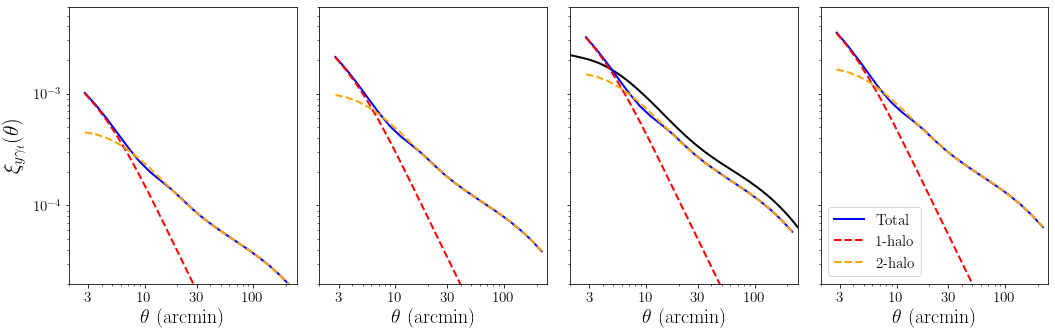

In [9]:
nbins = 4
bins = (np.arange(4) + 1).astype(int)
fig, ax = plt.subplots(1,4, figsize = (15,5),sharex=True,sharey='row')
jc = 0
texts_kk = [r'1,1',r'2,2',r'3,3',r'4,4']
texts_ky = [r'1,y',r'2,y',r'3,y',r'4,y']
theta_array = DV.xi_result_dict['gtg']['theta']
# for j2 in range(4):
for j2 in range(4):
    bin_str = 'bin_' + str(1) + '_' + str(j2 + 1)

    if j2 == 2:
        hodf = np.loadtxt('/global/cfs/cdirs/des/shivamp/HOD/examples/outputs/gamma_t/gt.txt')
#         print(hodf.shape)
        thv, gtv = hodf[:,0], hodf[:,1]
        ax[j2].errorbar(thv, gtv, linestyle='-', marker='',lw = 2, color ='black',label='HOD Code')  
    ax[j2].errorbar(theta_array, DV.xi_result_dict['gtg'][bin_str]['tot2'], linestyle='-', marker='',lw = 2, color ='blue',label='Total')  
    ax[j2].errorbar(theta_array, DV.xi_result_dict['gtg'][bin_str]['1h'], linestyle='--', marker='',lw = 2, color ='red',label='1-halo')  
    ax[j2].errorbar(theta_array, DV.xi_result_dict['gtg'][bin_str]['2h'], linestyle='--', marker='',lw = 2, color ='orange',label='2-halo')  



#     yk_g = df['Yshear_y3'][str(j2)]['xip']
#     yk_th_g = df['Yshear_y3'][str(j2)]['theta'] * 180./np.pi
#     yk_err = df['Yshear_y3'][str(j2)]['err_p']
#     ax[j2].errorbar(yk_th_g, yk_g,yerr=yk_err, ls='',marker='s',color='black',label='Planck x Y3')

#     yk_g = df['Yshear_y1'][str(j2)]['xip']
#     yk_th_g = df['Yshear_y1'][str(j2)]['theta'] * 180./np.pi
#     yk_err = df['Yshear_y1'][str(j2)]['err_p']            
#     ax[j2].errorbar(yk_th_g, yk_g,yerr=yk_err, ls='',marker='s',color='blue',label='Y1')
    ax[j2].set_ylim(2e-5,6e-3)
    ax[j2].set_xscale('log')
    ax[j2].set_yscale('log')

    ax[j2].set_xlabel(r'$\theta$ (arcmin)', size = 20)
    ticks  = np.array([3,10,30,100])
    labels_bottom = ticks
    ax[j2].set_xticks(ticks)
    ax[j2].set_xticklabels(labels_bottom,  fontsize=15)

    ax[j2].tick_params(axis='both', which='minor', labelsize=15)    
    ax[j2].tick_params(axis='both', which='major', labelsize=15)
    ax[j2].set_xlim((2,250))
#     ax[j2].text( 0.75, 0.96,str(j2+1) + ',y', verticalalignment='top', horizontalalignment='left', transform=ax[j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    


    jc += 1

# ax[0,0].set_ylabel(r'$\xi_{\rm mm}$ comparison', size = 22)
ax[0].set_ylabel(r'$\xi_{y\gamma_t}(\theta)$ ', size = 22)
# ax[1,0].set_ylabel(r'$\xi_{y\kappa}(\theta)$ ', size = 22)
# ax[2,0].set_ylabel(r'$\xi_{\kappa \kappa}(\theta)$ ', size = 22)
ax[3].legend(fontsize=15,loc='lower left')
#     ax[1,j].tick_params(axis='both', which='major', labelsize=15)



plt.tight_layout()

# fig.savefig('xi_yk_kk_allbins.pdf')









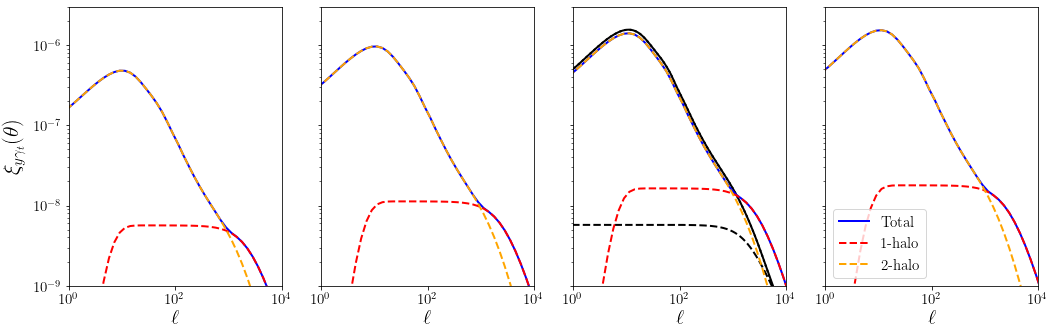

In [107]:
nbins = 4
bins = (np.arange(4) + 1).astype(int)
fig, ax = plt.subplots(1,4, figsize = (15,5),sharex=True,sharey='row')
jc = 0
texts_kk = [r'1,1',r'2,2',r'3,3',r'4,4']
texts_ky = [r'1,y',r'2,y',r'3,y',r'4,y']

# for j2 in range(4):
for j2 in range(4):
    bin_str = 'bin_' + str(1) + '_' + str(j2 + 1)
    theta_array = DV.Cl_result_dict['l_array']
    if j2 == 2:
        hodf = np.loadtxt('/global/cfs/cdirs/des/shivamp/HOD/examples/outputs/C_ell/Cl.txt')
        thv, gtv = hodf[:,0], hodf[:,1]
        ax[j2].errorbar(thv, gtv, linestyle='-', marker='',lw = 2, color ='black',label='HOD Code') 
        
        hodf = np.loadtxt('/global/cfs/cdirs/des/shivamp/HOD/examples/outputs/C_ell/Cl_1h.txt')
        thv, gtv = hodf[:,0], hodf[:,1]
        ax[j2].errorbar(thv, gtv, linestyle='--', marker='',lw = 2, color ='black',label='HOD 1h')  

        hodf = np.loadtxt('/global/cfs/cdirs/des/shivamp/HOD/examples/outputs/C_ell/Cl_2h.txt')
        thv, gtv = hodf[:,0], hodf[:,1]
        ax[j2].errorbar(thv, gtv, linestyle=':', marker='',lw = 2, color ='black',label='HOD 2h')  


        
        
    ax[j2].errorbar(theta_array, DV.Cl_result_dict['gk'][bin_str]['tot2'], linestyle='-', marker='',lw = 2, color ='blue',label='Total')  
    ax[j2].errorbar(theta_array, DV.Cl_result_dict['gk'][bin_str]['1h'], linestyle='--', marker='',lw = 2, color ='red',label='1-halo')  
    ax[j2].errorbar(theta_array, DV.Cl_result_dict['gk'][bin_str]['2h'], linestyle='--', marker='',lw = 2, color ='orange',label='2-halo')  



#     yk_g = df['Yshear_y3'][str(j2)]['xip']
#     yk_th_g = df['Yshear_y3'][str(j2)]['theta'] * 180./np.pi
#     yk_err = df['Yshear_y3'][str(j2)]['err_p']
#     ax[j2].errorbar(yk_th_g, yk_g,yerr=yk_err, ls='',marker='s',color='black',label='Planck x Y3')

#     yk_g = df['Yshear_y1'][str(j2)]['xip']
#     yk_th_g = df['Yshear_y1'][str(j2)]['theta'] * 180./np.pi
#     yk_err = df['Yshear_y1'][str(j2)]['err_p']            
#     ax[j2].errorbar(yk_th_g, yk_g,yerr=yk_err, ls='',marker='s',color='blue',label='Y1')
    ax[j2].set_ylim(1e-9,3e-6)
    ax[j2].set_xscale('log')
    ax[j2].set_yscale('log')

    ax[j2].set_xlabel(r'$\ell$', size = 20)
#     ticks  = np.array([3,10,30,100])
#     labels_bottom = ticks
#     ax[j2].set_xticks(ticks)
#     ax[j2].set_xticklabels(labels_bottom,  fontsize=15)

    ax[j2].tick_params(axis='both', which='minor', labelsize=15)    
    ax[j2].tick_params(axis='both', which='major', labelsize=15)
    ax[j2].set_xlim((1,10000))
#     ax[j2].text( 0.75, 0.96,str(j2+1) + ',y', verticalalignment='top', horizontalalignment='left', transform=ax[j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    


    jc += 1

# ax[0,0].set_ylabel(r'$\xi_{\rm mm}$ comparison', size = 22)
ax[0].set_ylabel(r'$\xi_{y\gamma_t}(\theta)$ ', size = 22)
# ax[1,0].set_ylabel(r'$\xi_{y\kappa}(\theta)$ ', size = 22)
# ax[2,0].set_ylabel(r'$\xi_{\kappa \kappa}(\theta)$ ', size = 22)
ax[3].legend(fontsize=15,loc='lower left')
#     ax[1,j].tick_params(axis='both', which='major', labelsize=15)



plt.tight_layout()

# fig.savefig('xi_yk_kk_allbins.pdf')










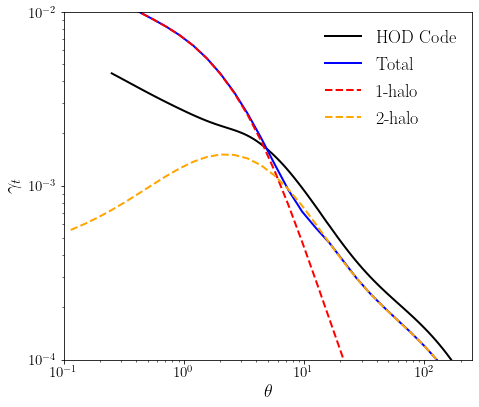

In [9]:
DV = dill.load(open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/results/DV_obj_temp_all_codecomp_gammat.pk','rb'))  
theta_array = DV.xi_result_dict['gtg']['theta']

bin_str = 'bin_' + str(1) + '_' + str(3)
hodf = np.loadtxt('/global/cfs/cdirs/des/shivamp/HOD/examples/outputs/gamma_t/gt.txt')
thv, gtv = hodf[:,0], hodf[:,1]




fig, ax = plt.subplots(1,1, figsize = (7,6))

ax.errorbar(thv, gtv, linestyle='-', marker='',lw = 2, color ='black',label='HOD Code')  
ax.errorbar(theta_array, DV.xi_result_dict['gtg'][bin_str]['tot2'], linestyle='-', marker='',lw = 2, color ='blue',label='Total')  
ax.errorbar(theta_array, DV.xi_result_dict['gtg'][bin_str]['1h'], linestyle='--', marker='',lw = 2, color ='red',label='1-halo')  
ax.errorbar(theta_array, DV.xi_result_dict['gtg'][bin_str]['2h'], linestyle='--', marker='',lw = 2, color ='orange',label='2-halo')  

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$\theta$', size = 18)
ax.set_ylabel(r'$\gamma_t$', size = 20)
ax.set_ylim(1e-4,1e-2)
ax.set_xlim(0.1,250.0)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='minor', labelsize=15)
ax.legend(fontsize = 18, frameon = False)
plt.tight_layout()









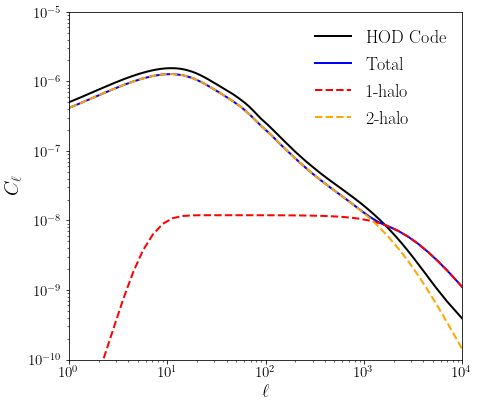

In [10]:
DV = dill.load(open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/results/DV_obj_temp_all_codecomp_gammat.pk','rb'))  
theta_array = DV.Cl_result_dict['l_array']

bin_str = 'bin_' + str(1) + '_' + str(3)
hodf = np.loadtxt('/global/cfs/cdirs/des/shivamp/HOD/examples/outputs/C_ell/Cl.txt')
thv, gtv = hodf[:,0], hodf[:,1]



fig, ax = plt.subplots(1,1, figsize = (7,6))

ax.errorbar(thv, gtv, linestyle='-', marker='',lw = 2, color ='black',label='HOD Code')  
ax.errorbar(theta_array, DV.Cl_result_dict['gk'][bin_str]['tot2'], linestyle='-', marker='',lw = 2, color ='blue',label='Total')  
ax.errorbar(theta_array, DV.Cl_result_dict['gk'][bin_str]['1h'], linestyle='--', marker='',lw = 2, color ='red',label='1-halo')  
ax.errorbar(theta_array, DV.Cl_result_dict['gk'][bin_str]['2h'], linestyle='--', marker='',lw = 2, color ='orange',label='2-halo')  

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$\ell$', size = 18)
ax.set_ylabel(r'$C_{\ell}$', size = 20)
ax.set_ylim(1e-10,1e-5)
ax.set_xlim(1.0,10000.0)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='minor', labelsize=15)
ax.legend(fontsize = 18, frameon = False)
plt.tight_layout()










In [11]:
thv = DV.xi_result_dict['gtg']['theta']
gtv = DV.xi_result_dict['gtg'][bin_str]['tot2']
gt1hv = DV.xi_result_dict['gtg'][bin_str]['1h']
gt2hv = DV.xi_result_dict['gtg'][bin_str]['2h']
ellv = DV.Cl_result_dict['l_array']
Clv = DV.Cl_result_dict['gk'][bin_str]['tot2'],
Cl1hv = DV.Cl_result_dict['gk'][bin_str]['1h']
Cl2hv = DV.Cl_result_dict['gk'][bin_str]['2h']

outdict = {'theta':thv, 'gammat_total':gtv, 'gammat_1h':gt1hv, 'gammat_2h':gt2hv, 
          'ell':ellv, 'Cl_total':Clv, 'Cl_1h':Cl1hv, 'Cl_2h':Cl2hv}
save_data_fname = 'save_gtCl_code_comp_bin13_hres.pk'
with open(save_data_fname,'wb') as f:
    dill.dump(outdict,f)

    
    

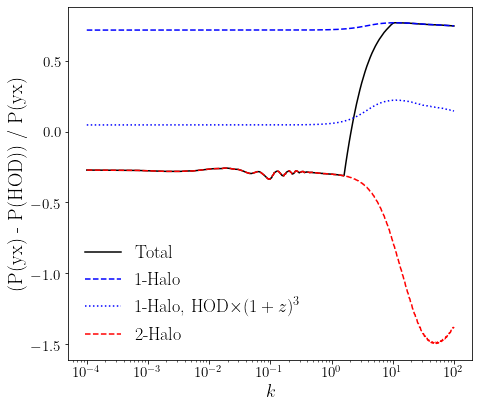

In [3]:


pkmm_yx = dill.load(open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/results/save_allgm_code_comp.pk','rb'))   
h0 = 0.6736

# from scipy import interpolate
# zv = 0.5
# ind_zv_yx = np.where(pkmm_yx['z'] > zv)[0][0]
# print(pkmm_yx['z'][ind_zv_yx])

pkhodtot = np.loadtxt('/global/cfs/cdirs/des/shivamp/HOD/examples/outputs/P_gm/Pgm.txt')
Pkvaltot = pkmm_yx['Pktot']
Pk_interpt = interpolate.interp1d(pkhodtot[:,0] * (1./h0), (h0**3) * pkhodtot[:,1])

pkhod1h = np.loadtxt('/global/cfs/cdirs/des/shivamp/HOD/examples/outputs/P_gm/Pgm_1h.txt')
Pkval1h = pkmm_yx['Pk1h']
Pk_interp1h = interpolate.interp1d(pkhod1h[:,0] * (1./h0), (h0**3) * pkhod1h[:,1])

pkhod2h = np.loadtxt('/global/cfs/cdirs/des/shivamp/HOD/examples/outputs/P_gm/Pgm_2h.txt')
Pkval2h = pkmm_yx['Pk2h']
Pk_interp2h = interpolate.interp1d(pkhod2h[:,0] * (1./h0), (h0**3) * pkhod2h[:,1])

kv = pkmm_yx['k']

fig, ax = plt.subplots(1,1, figsize = (7,6))


ax.errorbar(kv,(Pkvaltot - Pk_interpt(kv))/Pkvaltot,label=r'Total',ls='-',marker='',elinewidth=2.0,color='black')
ax.errorbar(kv,(Pkval1h - Pk_interp1h(kv))/Pkval1h,label=r'1-Halo',ls='--',marker='',elinewidth=2.0,color='blue')
ax.errorbar(kv,(Pkval1h - (1.5**3)* Pk_interp1h(kv))/Pkval1h,label=r'1-Halo, HOD$\times (1+z)^3$',ls=':',marker='',elinewidth=2.0,color='blue')

ax.errorbar(kv,(Pkval2h - Pk_interp2h(kv))/Pkval2h,label=r'2-Halo',ls='--',marker='',elinewidth=2.0,color='red')
# ax.axhline((1.5**3 - 1))

# ax.errorbar(pkmm_yx['k'],Pkval,label=r'yx',ls='--',marker='',elinewidth=2.0,color='blue')
# ax.errorbar(pkmm_yx['k'],Pk_cs_interp(pkmm_yx['k']),label=r'HOD',ls='-',marker='',elinewidth=2.0,color='red')
# ax.errorbar(pkmm_yx['k'],(1.5**3)*Pk_cs_interp(pkmm_yx['k']),label=r'HOD$\times (1+z)^3$',ls=':',marker='',elinewidth=2.0,color='k')   

ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_xlabel(r'$k$', size = 18)
ax.set_ylabel(r'(P(yx) - P(HOD)) / P(yx)', size = 20)
# ax.set_ylim(1e0,4e4)
# ax.set_xlim(0.0,1.0)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='minor', labelsize=15)
ax.legend(fontsize = 18, frameon = False)
plt.tight_layout()







In [4]:
pkmm_yx.keys()


dict_keys(['k', 'z', 'Pk1h', 'Pk2h', 'Pktot', 'dndm', 'M', 'Nc', 'Ns', 'nbar', 'rho_bar', 'halo_conc', 'nfw_mk', 'Pnl'])

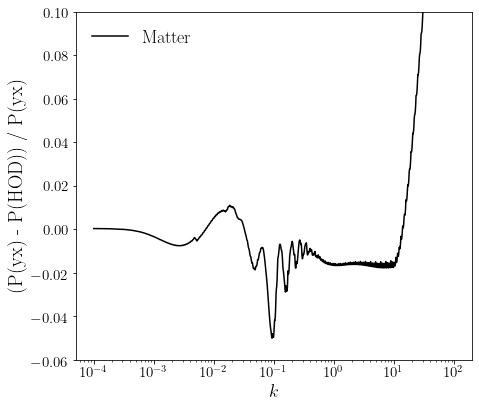

In [7]:


pkmm_yx = dill.load(open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/results/save_allgm_code_comp.pk','rb'))   
h0 = 0.6736

pkhodtot = np.loadtxt('/global/cfs/cdirs/des/shivamp/HOD/examples/outputs/Pk_matter/Pk_matter_values.txt')
Pkvaltot = pkmm_yx['Pnl']
Pk_interpt = interpolate.interp1d(pkhodtot[:,0] * (1./h0), (h0**3) * pkhodtot[:,1])

kv = pkmm_yx['k']

fig, ax = plt.subplots(1,1, figsize = (7,6))


ax.errorbar(kv,(Pkvaltot - Pk_interpt(kv))/Pkvaltot,label=r'Matter',ls='-',marker='',elinewidth=2.0,color='black')
# ax.errorbar(kv,(Pkval1h - Pk_interp1h(kv))/Pkval1h,label=r'1-Halo',ls='--',marker='',elinewidth=2.0,color='blue')
# ax.errorbar(kv,(Pkval1h - (1.5**3)* Pk_interp1h(kv))/Pkval1h,label=r'1-Halo, HOD$\times (1+z)^3$',ls=':',marker='',elinewidth=2.0,color='blue')

# ax.errorbar(kv,(Pkval2h - Pk_interp2h(kv))/Pkval2h,label=r'2-Halo',ls='--',marker='',elinewidth=2.0,color='red')
# ax.axhline((1.5**3 - 1))

# ax.errorbar(pkmm_yx['k'],Pkval,label=r'yx',ls='--',marker='',elinewidth=2.0,color='blue')
# ax.errorbar(pkmm_yx['k'],Pk_cs_interp(pkmm_yx['k']),label=r'HOD',ls='-',marker='',elinewidth=2.0,color='red')
# ax.errorbar(pkmm_yx['k'],(1.5**3)*Pk_cs_interp(pkmm_yx['k']),label=r'HOD$\times (1+z)^3$',ls=':',marker='',elinewidth=2.0,color='k')   

ax.set_xscale('log')
ax.set_ylim(-0.06,0.1)
# ax.set_yscale('log')
ax.set_xlabel(r'$k$', size = 18)
ax.set_ylabel(r'(P(yx) - P(HOD)) / P(yx)', size = 20)
# ax.set_ylim(1e0,4e4)
# ax.set_xlim(0.0,1.0)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='minor', labelsize=15)
ax.legend(fontsize = 18, frameon = False)
plt.tight_layout()








In [78]:
ind_vals = [0, 10, 50, 100, 200]

for ind in ind_vals:
    print(pkmm_yx['z'][ind])
    print(sp.integrate.simps(pkmm_yx['dndm'][ind,:] * pkmm_yx['M'],pkmm_yx['M']))


    

0.01
67558248831.33839
0.13008032128514058
66410574155.60588
0.6104016064257028
61305700628.63851
1.2108032128514057
55720166597.15097
2.411606425702811
46174328182.015144


0.5023293172690764


/global/u1/s/spandey/self_module_ini/myenv3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in true_divide


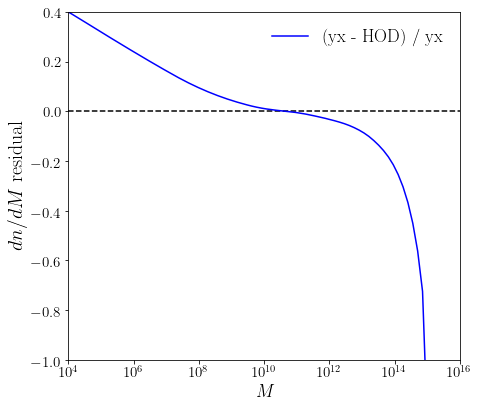

In [97]:


pkmm_yx = dill.load(open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/results/save_Pgm_code_comp.pk','rb'))   


from scipy import interpolate
zv = 0.5
ind_zv_yx = np.where(pkmm_yx['z'] > zv)[0][0]
print(pkmm_yx['z'][ind_zv_yx])

pkhod = np.loadtxt('/global/cfs/cdirs/des/shivamp/HOD/examples/outputs/HMF/HMF_values.txt')
Pkval = pkmm_yx['dndm'][ind_zv_yx,:]

# pkhod = np.loadtxt('/global/cfs/cdirs/des/shivamp/HOD/examples/outputs/P_gm/Pgm_1h.txt')
# Pkval = pkmm_yx['Pk1h'][ind_zv_yx,:]

# pkhod = np.loadtxt('/global/cfs/cdirs/des/shivamp/HOD/examples/outputs/P_gm/Pgm_2h.txt')
# Pkval = pkmm_yx['Pk2h'][ind_zv_yx,:]



h0 = 0.6736
Pk_cs_interp = interpolate.interp1d(np.log(pkhod[:,0] * (h0)), np.log((1./h0**4) * (1./pkhod[:,0]) *pkhod[:,1]),fill_value='extrapolate')



fig, ax = plt.subplots(1,1, figsize = (7,6))

ax.errorbar(pkmm_yx['M'],(Pkval - np.exp(Pk_cs_interp(np.log(pkmm_yx['M']))))/Pkval,label=r'(yx - HOD) / yx',ls='-',marker='',elinewidth=2.0,color='blue')
# ax.errorbar(pkmm_yx['M'],np.exp(Pk_cs_interp(np.log(pkmm_yx['M']))),label=r'Cosmosis',ls='-',marker='',elinewidth=2.0,color='red')

ax.set_xscale('log')
ax.axhline(0,color='k',ls = '--')
# ax.set_yscale('log')
ax.set_xlabel(r'$M$', size = 18)
ax.set_ylabel(r'$dn/dM$ residual', size = 20)
ax.set_ylim(-1.0,0.4)
ax.set_xlim(1e4,1e16)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='minor', labelsize=15)
ax.legend(fontsize = 18, frameon = False)
plt.tight_layout()








In [13]:
import pickle as pk
cs_ia = pk.load(open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/results/save_block_testIA.pk','rb'), encoding='latin',fix_imports=True)   

DV = dill.load(open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/results/DV_obj_temp_kk_gty_plancky3_beamed_B12_testIA_new.pk','rb'))    
# theta_array = DV.Cl_result_dict['l_array']




In [14]:
# cs_ia
bv = 4
yx_II = DV.Cl_result_dict['kk']['bin_' + str(bv) + '_' + str(bv)]['tot_II']
yx_GI = DV.Cl_result_dict['kk']['bin_' + str(bv) + '_' + str(bv)]['tot_GI']
yx_GG = DV.Cl_result_dict['kk']['bin_' + str(bv) + '_' + str(bv)]['tot_phy']
yx_ell = DV.Cl_result_dict['l_array']



In [15]:
cs_ia.keys()
cs_ell = cs_ia['ell']
cs_II = cs_ia['intrinsic_intrinsic_'+ str(bv) + '_' + str(bv)]
cs_GI = cs_ia['shear_intrinsic_'+ str(bv) + '_' + str(bv)]
cs_GG = cs_ia['shear_shear_'+ str(bv) + '_' + str(bv)]


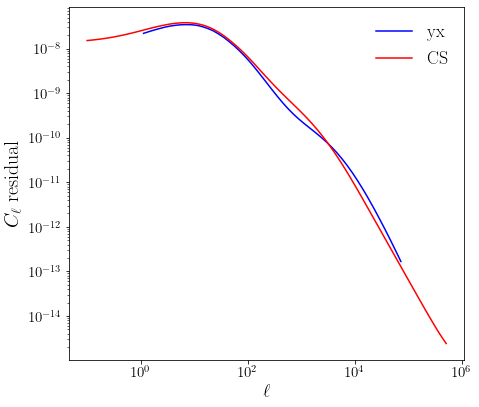

In [16]:
fig, ax = plt.subplots(1,1, figsize = (7,6))

ax.errorbar(yx_ell,yx_GG,label=r'yx',ls='-',marker='',elinewidth=2.0,color='blue')
ax.errorbar(cs_ell,cs_GG,label=r'CS',ls='-',marker='',elinewidth=2.0,color='red')
# ax.errorbar(pkmm_yx['M'],np.exp(Pk_cs_interp(np.log(pkmm_yx['M']))),label=r'Cosmosis',ls='-',marker='',elinewidth=2.0,color='red')

ax.set_xscale('log')
ax.axhline(0,color='k',ls = '--')
ax.set_yscale('log')
ax.set_xlabel(r'$\ell$', size = 18)
ax.set_ylabel(r'$C_{\ell}$ residual', size = 20)
# ax.set_ylim(-1.0,0.4)
# ax.set_xlim(1e4,1e16)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='minor', labelsize=15)
ax.legend(fontsize = 18, frameon = False)
plt.tight_layout()






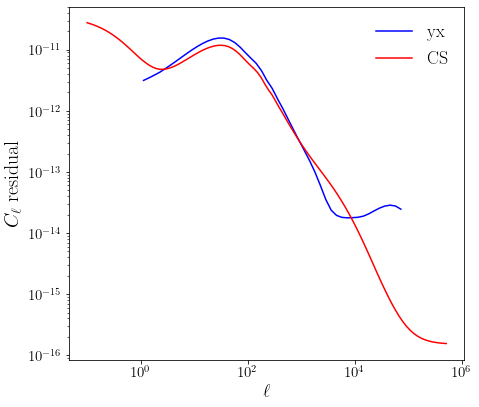

In [21]:
fig, ax = plt.subplots(1,1, figsize = (7,6))

ax.errorbar(yx_ell,yx_II,label=r'yx',ls='-',marker='',elinewidth=2.0,color='blue')
ax.errorbar(cs_ell,cs_II,label=r'CS',ls='-',marker='',elinewidth=2.0,color='red')
# ax.errorbar(pkmm_yx['M'],np.exp(Pk_cs_interp(np.log(pkmm_yx['M']))),label=r'Cosmosis',ls='-',marker='',elinewidth=2.0,color='red')

ax.set_xscale('log')
ax.axhline(0,color='k',ls = '--')
ax.set_yscale('log')
ax.set_xlabel(r'$\ell$', size = 18)
ax.set_ylabel(r'$C_{\ell}$ residual', size = 20)
# ax.set_ylim(-1.0,0.4)
# ax.set_xlim(1e4,1e16)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='minor', labelsize=15)
ax.legend(fontsize = 18, frameon = False)
plt.tight_layout()







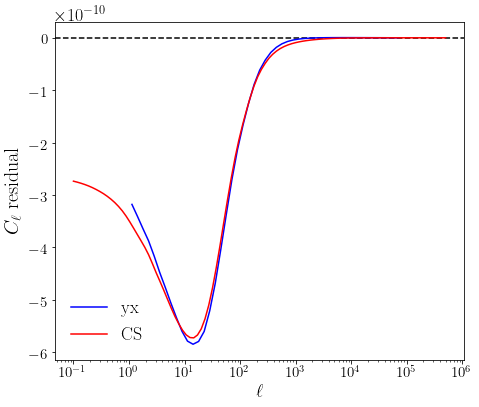

In [18]:
fig, ax = plt.subplots(1,1, figsize = (7,6))

ax.errorbar(yx_ell,yx_GI,label=r'yx',ls='-',marker='',elinewidth=2.0,color='blue')
ax.errorbar(cs_ell,cs_GI,label=r'CS',ls='-',marker='',elinewidth=2.0,color='red')
# ax.errorbar(pkmm_yx['M'],np.exp(Pk_cs_interp(np.log(pkmm_yx['M']))),label=r'Cosmosis',ls='-',marker='',elinewidth=2.0,color='red')

ax.set_xscale('log')
ax.axhline(0,color='k',ls = '--')
# ax.set_yscale('log')
ax.set_xlabel(r'$\ell$', size = 18)
ax.set_ylabel(r'$C_{\ell}$ residual', size = 20)
# ax.set_ylim(-1.0,0.4)
# ax.set_xlim(1e4,1e16)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='minor', labelsize=15)
ax.legend(fontsize = 18, frameon = False)
plt.tight_layout()








In [3]:
Pe_hse = np.load('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/results/save_Pe_HSE.npz')
Pe_yx = np.load('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/results/save_Pe_yx.npz')



In [6]:
z_hse, M_hse, P_hse, r_hse = Pe_hse['z'], Pe_hse['M'], Pe_hse['P'], Pe_hse['r']
ind_zhse = np.where(z_hse < 0.061)[0][-1]
ind_Mhse = np.where(M_hse < 1.4*10**14)[0][-1]
P_hse_ind = P_hse[ind_zhse, ind_Mhse,:]


In [7]:
r_hse.shape


(199,)

In [8]:
z_yx, M_yx, P_yx, r_yx, x_yx = Pe_yx['z'], Pe_yx['M_mat'], Pe_yx['Pe'], Pe_yx['rv'], Pe_yx['x']
ind_zyx = np.where(z_yx < 0.06)[0][-1]
ind_Myx = np.where(M_yx[0,:] < 1.4*10**14)[0][-1]
r_yx_ind = r_yx[ind_zyx, ind_Myx] * x_yx
P_yx_ind = P_yx[ind_zyx, ind_Myx,:]


In [25]:
z_yx


array([0.01      , 0.05746032, 0.10492063, 0.15238095, 0.19984127,
       0.24730159, 0.2947619 , 0.34222222, 0.38968254, 0.43714286,
       0.48460317, 0.53206349, 0.57952381, 0.62698413, 0.67444444,
       0.72190476, 0.76936508, 0.8168254 , 0.86428571, 0.91174603,
       0.95920635, 1.00666667, 1.05412698, 1.1015873 , 1.14904762,
       1.19650794, 1.24396825, 1.29142857, 1.33888889, 1.38634921,
       1.43380952, 1.48126984, 1.52873016, 1.57619048, 1.62365079,
       1.67111111, 1.71857143, 1.76603175, 1.81349206, 1.86095238,
       1.9084127 , 1.95587302, 2.00333333, 2.05079365, 2.09825397,
       2.14571429, 2.1931746 , 2.24063492, 2.28809524, 2.33555556,
       2.38301587, 2.43047619, 2.47793651, 2.52539683, 2.57285714,
       2.62031746, 2.66777778, 2.7152381 , 2.76269841, 2.81015873,
       2.85761905, 2.90507937, 2.95253968, 3.        ])

In [26]:
z_hse


array([0.        , 0.06      , 0.12      , 0.18000001, 0.23999999,
       0.30000001, 0.36000001, 0.41999999, 0.47999999, 0.54000002,
       0.60000002, 0.66000003, 0.72000003, 0.77999997, 0.83999997,
       0.89999998, 0.95999998, 1.01999998, 1.08000004, 1.13999999,
       1.20000005, 1.25999999, 1.32000005, 1.38      , 1.44000006,
       1.5       , 1.55999994, 1.62      , 1.67999995, 1.74000001,
       1.79999995, 1.86000001, 1.91999996, 1.98000002, 2.03999996,
       2.0999999 , 2.16000009, 2.22000003, 2.27999997, 2.33999991,
       2.4000001 , 2.46000004, 2.51999998, 2.57999992, 2.6400001 ,
       2.70000005, 2.75999999, 2.81999993, 2.88000011, 2.94000006,
       3.        ])

In [30]:
M_yx[0,:]


array([1.00000000e+07, 1.38949549e+07, 1.93069773e+07, 2.68269580e+07,
       3.72759372e+07, 5.17947468e+07, 7.19685673e+07, 1.00000000e+08,
       1.38949549e+08, 1.93069773e+08, 2.68269580e+08, 3.72759372e+08,
       5.17947468e+08, 7.19685673e+08, 1.00000000e+09, 1.38949549e+09,
       1.93069773e+09, 2.68269580e+09, 3.72759372e+09, 5.17947468e+09,
       7.19685673e+09, 1.00000000e+10, 1.38949549e+10, 1.93069773e+10,
       2.68269580e+10, 3.72759372e+10, 5.17947468e+10, 7.19685673e+10,
       1.00000000e+11, 1.38949549e+11, 1.93069773e+11, 2.68269580e+11,
       3.72759372e+11, 5.17947468e+11, 7.19685673e+11, 1.00000000e+12,
       1.38949549e+12, 1.93069773e+12, 2.68269580e+12, 3.72759372e+12,
       5.17947468e+12, 7.19685673e+12, 1.00000000e+13, 1.38949549e+13,
       1.93069773e+13, 2.68269580e+13, 3.72759372e+13, 5.17947468e+13,
       7.19685673e+13, 1.00000000e+14, 1.38949549e+14, 1.93069773e+14,
       2.68269580e+14, 3.72759372e+14, 5.17947468e+14, 7.19685673e+14,
      

In [31]:
M_hse


array([1.00000000e+00, 1.17648995e+00, 1.38412869e+00, 1.62841356e+00,
       1.91581225e+00, 2.25393391e+00, 2.65173078e+00, 3.11973476e+00,
       3.67033672e+00, 4.31811476e+00, 5.08021879e+00, 5.97682619e+00,
       7.03167629e+00, 8.27269745e+00, 9.73274517e+00, 1.14504776e+01,
       1.34713726e+01, 1.58489351e+01, 1.86461124e+01, 2.19369659e+01,
       2.58086205e+01, 3.03635845e+01, 3.57224541e+01, 4.20271111e+01,
       4.94444733e+01, 5.81709137e+01, 6.84375153e+01, 8.05160370e+01,
       9.47263336e+01, 1.11444557e+02, 1.31113434e+02, 1.54253616e+02,
       1.81477875e+02, 2.13506851e+02, 2.51188736e+02, 2.95520966e+02,
       3.47677551e+02, 4.09039062e+02, 4.81230469e+02, 5.66162720e+02,
       6.66084900e+02, 7.83642029e+02, 9.21947266e+02, 1.08466150e+03,
       1.27609363e+03, 1.50131104e+03, 1.76627795e+03, 2.07800781e+03,
       2.44475586e+03, 2.87623022e+03, 3.38385522e+03, 3.98107300e+03,
       4.68369336e+03, 5.51031494e+03, 6.48283154e+03, 7.62698828e+03,
      

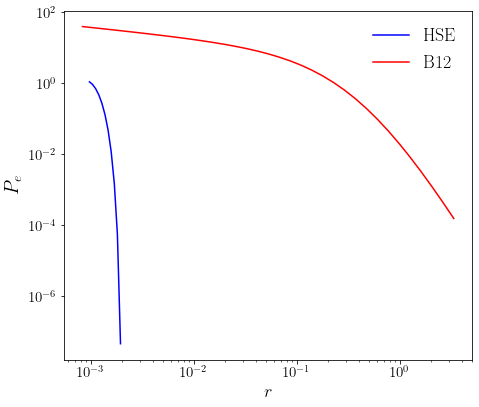

In [9]:
fig, ax = plt.subplots(1,1, figsize = (7,6))

ax.errorbar(r_hse,P_hse_ind,label=r'HSE',ls='-',marker='',elinewidth=2.0,color='blue')
ax.errorbar(r_yx_ind,P_yx_ind,label=r'B12',ls='-',marker='',elinewidth=2.0,color='red')
# ax.errorbar(pkmm_yx['M'],np.exp(Pk_cs_interp(np.log(pkmm_yx['M']))),label=r'Cosmosis',ls='-',marker='',elinewidth=2.0,color='red')

ax.set_xscale('log')
# ax.axhline(0,color='k',ls = '--')
ax.set_yscale('log')
ax.set_xlabel(r'$r$', size = 18)
ax.set_ylabel(r'$P_e$', size = 20)
# ax.set_ylim(-1.0,0.4)
# ax.set_xlim(1e4,1e16)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='minor', labelsize=15)
ax.legend(fontsize = 18, frameon = False)
plt.tight_layout()












In [42]:
r_yx_ind


array([8.27479478e-04, 1.05608816e-03, 1.34785481e-03, 1.72022817e-03,
       2.19547752e-03, 2.80202455e-03, 3.57614300e-03, 4.56412803e-03,
       5.82506478e-03, 7.43436193e-03, 9.48826140e-03, 1.21095940e-02,
       1.54551250e-02, 1.97249297e-02, 2.51743580e-02, 3.21293061e-02,
       4.10057053e-02, 5.23343973e-02, 6.67928798e-02, 8.52458232e-02,
       1.08796782e-01, 1.38854191e-01, 1.77215593e-01, 2.26175143e-01,
       2.88660802e-01, 3.68409444e-01, 4.70190333e-01, 6.00090341e-01,
       7.65877970e-01, 9.77467932e-01, 1.24751409e+00, 1.59216620e+00,
       2.03203574e+00, 2.59342852e+00, 3.30991791e+00])

In [43]:
r_hse


array([9.66465201e-04, 1.03594566e-03, 1.11042116e-03, 1.19025080e-03,
       1.27581950e-03, 1.36753985e-03, 1.46585409e-03, 1.57123628e-03,
       1.68419453e-03, 1.80527349e-03, 1.93505699e-03, 2.07417078e-03,
       2.22328566e-03, 2.38312060e-03, 2.55444628e-03, 2.73808879e-03,
       2.93493361e-03, 3.14592986e-03, 3.37209491e-03, 3.61451926e-03,
       3.87437182e-03, 4.15290552e-03, 4.45146337e-03, 4.77148495e-03,
       5.11451329e-03, 5.48220240e-03, 5.87632517e-03, 6.29878193e-03,
       6.75160968e-03, 7.23699180e-03, 7.75726869e-03, 8.31494897e-03,
       8.91272162e-03, 9.55346893e-03, 1.02402804e-02, 1.09764677e-02,
       1.17655804e-02, 1.26114235e-02, 1.35180754e-02, 1.44899077e-02,
       1.55316063e-02, 1.66481939e-02, 1.78450545e-02, 1.91279591e-02,
       2.05030933e-02, 2.19770877e-02, 2.35570495e-02, 2.52505969e-02,
       2.70658956e-02, 2.90116985e-02, 3.10973878e-02, 3.33330201e-02,
       3.57293748e-02, 3.82980067e-02, 4.10513010e-02, 4.40025331e-02,
      

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


Model
15.3 sigma
Model
32.8 sigma
Model
57.9 sigma
Model
64.7 sigma


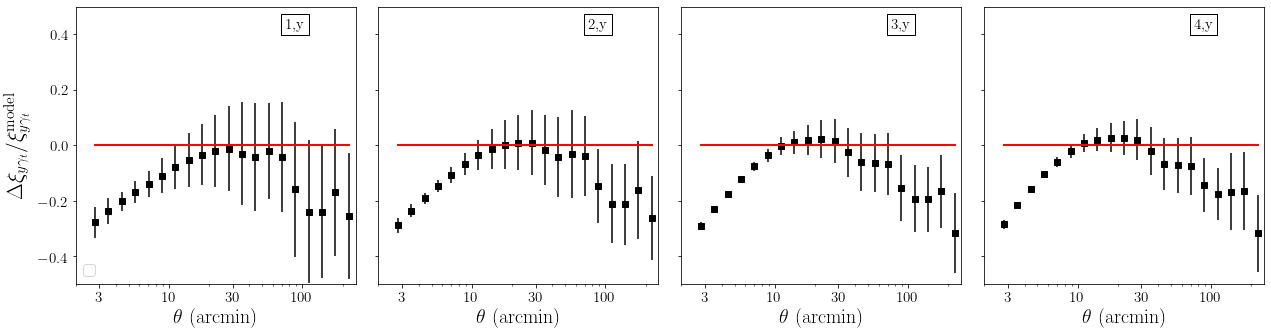

In [4]:
import matplotlib
import matplotlib.pyplot as pl
font = {'size': 18}
matplotlib.rc('font', **font)
pl.rc('text', usetex=True)
pl.rc('font', family='serif')
os.environ['COSMOSIS_SRC_DIR'] = '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/'
sys.path.insert(0, '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/cosmosis_code/')
fdir = '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/results/'
import scipy.interpolate as interpolate
ytype = 'planck'
# ytype = 'act'
do_residuals = 1
fnames = [
#     'DV_obj_temp_kk_gty_buzzard_nobeam_comp.pk',
         'DV_obj_temp_kk_gty_buzzard_nobeam_comp_duffy08.pk']

from astropy.io import fits
#     actf = fits.open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/data/DES_planckACT_theorycov_actmask.fits')  
actf = fits.open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/data/DES_planckACT_Buzz_theorycov2.fits')  
# actf['compton_shear'].header

bin1_gty = actf['compton_shear'].data['BIN1']
bin2_gty = actf['compton_shear'].data['BIN2']
gty_csf = actf['compton_shear'].data['VALUE']
gty_ang = actf['compton_shear'].data['ANG']
# gty_sig = np.sqrt(np.diag(actf['COVMAT'].data)[400:480])
# gty_cov = actf['COVMAT'].data[400:480,:][:,400:480]

dftemp = fits.open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/data/DES_planck_ACT.fits')
gty_sig = np.sqrt(np.diag(dftemp['COVMAT'].data)[400:480])
gty_cov = dftemp['COVMAT'].data[400:480,:][:,400:480]
label_yx = 'Buzzard'
ylims = [-0.5,0.5]

    
labels = ['Model','OWLS Ref','OWLS AGN']
colors = ['r','b','g']
nbins = 4
bins = (np.arange(4) + 1).astype(int)
fig, ax = pl.subplots(1,4, figsize = (18,5),sharex=True,sharey='row')


for j2 in range(4):
    for jf in range(len(fnames)):

        DV = dill.load(open(fdir + fnames[jf],'rb'))  

        jc = 0
        texts_kk = [r'1,1',r'2,2',r'3,3',r'4,4']
        texts_ky = [r'1,y',r'2,y',r'3,y',r'4,y']
        theta_array = DV.xi_result_dict['gty']['theta']
        bin_str = 'bin_' + str(j2+1) + '_' + str(0)

        Cl_j1_tot = DV.xi_result_dict['gty'][bin_str]['tot']
        sel_ind = np.where((bin1_gty == j2+1) & (bin2_gty == j2+1))[0]
#         yk_g = df['Yshear_y3'][str(j2)]['xip']
#         yk_th_g = df['Yshear_y3'][str(j2)]['theta'] * 180./np.pi
#         yk_err = df['Yshear_y3'][str(j2)]['err_p']
        yk_g = gty_csf[sel_ind]
        yk_th_g = gty_ang[sel_ind]
        yk_err = gty_sig[sel_ind]
        cov_bin = gty_cov[sel_ind,:][:,sel_ind]
        inv_cov_bin = np.linalg.inv(cov_bin)



        if do_residuals:
            Cl_interp = interpolate.interp1d(np.log(theta_array), np.log(Cl_j1_tot),fill_value='extrapolate')

            Cl_d_th = np.exp(Cl_interp(np.log(yk_th_g)))
            if jf == 0:
                Cl_d_th_ref = Cl_d_th
            
            diff = np.array([yk_g - Cl_d_th])
            snr_bin = np.sqrt(np.dot(diff,np.dot(inv_cov_bin,diff.T)))
            print(labels[jf])
            print(str(np.round(snr_bin[0][0],1)) + ' sigma')
            
            if jf == 0 and j2 == 1:
                ax[j2].errorbar(yk_th_g, (yk_g - Cl_d_th_ref)/Cl_d_th_ref ,yerr=yk_err/Cl_d_th_ref, ls='',marker='s',color='black',label=label_yx)
            else:
                ax[j2].errorbar(yk_th_g, (yk_g - Cl_d_th_ref)/Cl_d_th_ref,yerr=yk_err/Cl_d_th_ref, ls='',marker='s',color='black')
            
            if ((jf in [1,2]) and (j2 == 0)) or ((jf == 0) and (j2 == 1)):
                ax[j2].errorbar(yk_th_g, (Cl_d_th/Cl_d_th_ref) -1 , linestyle='-', marker='',lw = 2, color =colors[jf],label=labels[jf])  
            else:
                ax[j2].errorbar(yk_th_g, (Cl_d_th/Cl_d_th_ref) -1 , linestyle='-', marker='',lw = 2, color =colors[jf])  
        else:
            if jf == 0:
                ax[j2].errorbar(yk_th_g, yk_g,yerr=yk_err, ls='',marker='s',color='black',label=label_yx)
            else:
                ax[j2].errorbar(yk_th_g, yk_g,yerr=yk_err, ls='',marker='s',color='black')


            ax[j2].errorbar(theta_array, Cl_j1_tot, linestyle='-', marker='',lw = 2, color =colors[jf],label=labels[jf])  
            ax[j2].errorbar(theta_array, DV.xi_result_dict['gty'][bin_str]['1h'], linestyle=':', marker='',lw = 2, color =colors[jf])  
            ax[j2].errorbar(theta_array, DV.xi_result_dict['gty'][bin_str]['2h'], linestyle='--', marker='',lw = 2, color =colors[jf])  



        ax[j2].set_xscale('log')

        if do_residuals:
            ax[j2].set_ylim(ylims)        
        else:
            ax[j2].set_yscale('log')
            ax[j2].set_ylim(1e-11,5e-9)


        ax[j2].set_xlabel(r'$\theta$ (arcmin)', size = 20)
        ticks  = np.array([3,10,30,100])
        labels_bottom = ticks
        ax[j2].set_xticks(ticks)
        ax[j2].set_xticklabels(labels_bottom,  fontsize=15)

        ax[j2].tick_params(axis='both', which='minor', labelsize=15)    
        ax[j2].tick_params(axis='both', which='major', labelsize=15)
        ax[j2].set_xlim((2,250))
        ax[j2].text( 0.75, 0.96,str(j2+1) + ',y', verticalalignment='top', horizontalalignment='left', transform=ax[j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    


        jc += 1

    # ax[0,0].set_ylabel(r'$\xi_{\rm mm}$ comparison', size = 22)
    if do_residuals:
        ax[0].set_ylabel(r'$\Delta \xi_{y\gamma_t}/\xi^{\rm model}_{y\gamma_t}$ ', size = 22)
    else:
        ax[0].set_ylabel(r'$\xi_{y\gamma_t}(\theta)$ ', size = 22)
    # ax[1,0].set_ylabel(r'$\xi_{y\kappa}(\theta)$ ', size = 22)
    # ax[2,0].set_ylabel(r'$\xi_{\kappa \kappa}(\theta)$ ', size = 22)
    ax[0].legend(fontsize=15,loc='lower left')
#     ax[1].legend(fontsize=15,loc='lower left')
    #     ax[1,j].tick_params(axis='both', which='major', labelsize=15)



pl.tight_layout()

# fig.savefig('xi_sims_residual_' + str(ytype) + '.pdf')





